In [1]:
from pyiron import Project
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import scipy.optimize as optimize
%config InlineBackend.figure_format = "retina"

In [2]:
pr = Project("B2NiAlchemicalpot")

In [3]:
# Define the boltzman constant

from pint import UnitRegistry
ureg = UnitRegistry()
Kb = ureg.boltzmann_constant
Kb = (1 * Kb).to('eV/kelvin').magnitude

In [4]:
# Binary system

def get_Al_concentration(C_Al_vac, C_Ni_vac, C_Al_anti, C_Ni_anti):
    
    return (0.5 - 0.5*(C_Al_vac + C_Ni_anti - C_Al_anti)) / (1 - 0.5*(C_Al_vac + C_Ni_vac))

$$ C_{Al} = \frac{0.5 - 0.5*(C_{Va_{Al}} + C_{Ni_{Al}} - C_{Al_{Ni}})}{ 1 - 0.5*(C_{Va_{Al}} + C_{Va_{Ni}} )} $$

$$ C_{Ni} = \frac{0.5 - 0.5*(C_{Va_{Ni}} + C_{Al_{Ni}} - C_{Ni_{Al}})}{ 1 - 0.5*(C_{Va_{Al}} + C_{Va_{Ni}} )} $$

In [5]:
def get_concentration(Formation_energy, T):
    
    return np.exp(-Formation_energy / (Kb*T))

In [6]:
# Some energy values obtained from DFT calculations:

# Binary system

E_formB2 = -0.6623950965434235 # Formation energy per atom of B2 NiAl
EnergyB2 = -10.538507650072436 # Supercell energy of B2 NiAl with one Ni and Al atoms
Energy_tot_Nivac = -667.92703466 # Supercell energy of B2 NiAl with one Ni vacancy
Energy_tot_Alvac = -668.29706527 # Supercell energy of B2 NiAl with one Al vacancy
Energy_tot_Nianti = -675.16111505 # Supercell energy of B2 NiAl with one Ni antisite
Energy_tot_Alanti = -671.1130517 # Supercell energy of B2 NiAl with one Al antisite
Energy_tot_PtonNi = -675.60409945 # Supercell energy of B2 NiAl with one Pt on Ni
Energy_tot_PtonAl = -676.26162198 # Supercell energy of B2 NiAl with one Pt on Al
Ni_bulk = -5.468482140262621 # Ni bulk energy
Al_bulk = -3.745235316722968 # Al bulk energy
Pt_bulk = -6.096600128752684 # Pt bulk energy

# Ternary system 10%Pt

Pt_bulk = -6.096600128752684
total_E10PtB2NiAl = -689.4408127619649
EfPtB2NiAl = -0.7156043880040347
# Binomial weighted
EPt_Ni_vac = -682.9516806960476
EPt_Al_vac = -683.3704333254088
EPt_Pt_vac = -681.8751897749553
EPt_Ni_anti = -690.2184017103207
EPt_Al_anti = -686.1129519110792
EPt_PtonNi = -690.6418288118937
EPt_PtonAl = -691.4114213533885
# Ternary system 10%Pd

In [7]:
def get_box_energy(tot, i, Ni_bulk = Ni_bulk, Al_bulk = Al_bulk, Pt_bulk=Pt_bulk):
    """
    Returns: supercell energy - n_Ni * Ni_Bulk - n_Al * Al_bulk - n_Pt * Pt_bulk
    
    """
    if i == 'Nivac':
        n_Ni = 63
        n_Al = 64
        n_Pt = 0
    if i == 'Alvac':
        n_Ni = 64
        n_Al = 63
        n_Pt = 0
    if i == 'Nianti':
        n_Ni = 65
        n_Al = 63
        n_Pt = 0
    if i == 'Alanti':
        n_Ni = 63
        n_Al = 65
        n_Pt = 0
    if i == 'PtonNi':
        n_Ni = 63
        n_Al = 64
        n_Pt = 1
    if i == 'PtonAl':
        n_Ni = 64
        n_Al = 63
        n_Pt = 1    
    if i == 'Bulk':
        n_Ni = 64
        n_Al = 64
        n_Pt = 0
        
    return tot - n_Ni * Ni_bulk - n_Al * Al_bulk - n_Pt * Pt_bulk

In [8]:
mu_Al = np.linspace(E_formB2 , 0, 1000)
mu_Ni = E_formB2 - mu_Al

In [9]:
# Ni vacancy with respect to chemical potential: Supercell energy - defect free energy + mu_Ni

Ef_Nivac = get_box_energy(Energy_tot_Nivac, i='Nivac') - get_box_energy(64*EnergyB2, i='Bulk') + mu_Ni 

In [10]:
# plt.plot(mu_Al, Ef_Nivac)
# plt.xlabel('$\mu_{Al}$')
# plt.ylabel('Defect contribution')
# plt.title('Ni vacancy energy')

In [11]:
# Al vacancy with respect to chemical potential: Supercell energy - defect free energy + mu_Al

Ef_Alvac = get_box_energy(Energy_tot_Alvac, i='Alvac') - get_box_energy(64*EnergyB2, i='Bulk') + mu_Al 

In [12]:
# Ni antisite with respect to chemical potential: Supercell energy - defect free energy - mu_Ni + mu_Al

Ef_Nianti = get_box_energy(Energy_tot_Nianti, i='Nianti') - get_box_energy(64*EnergyB2, i='Bulk') - mu_Ni + mu_Al 

In [13]:
# Al antisite with respect to chemical potential: Supercell energy - defect free energy - mu_Al + mu_Ni

Ef_Alanti = get_box_energy(Energy_tot_Alanti, i='Alanti') - get_box_energy(64*EnergyB2, i='Bulk') + mu_Ni - mu_Al 

# Defect energies of B2 NiAl

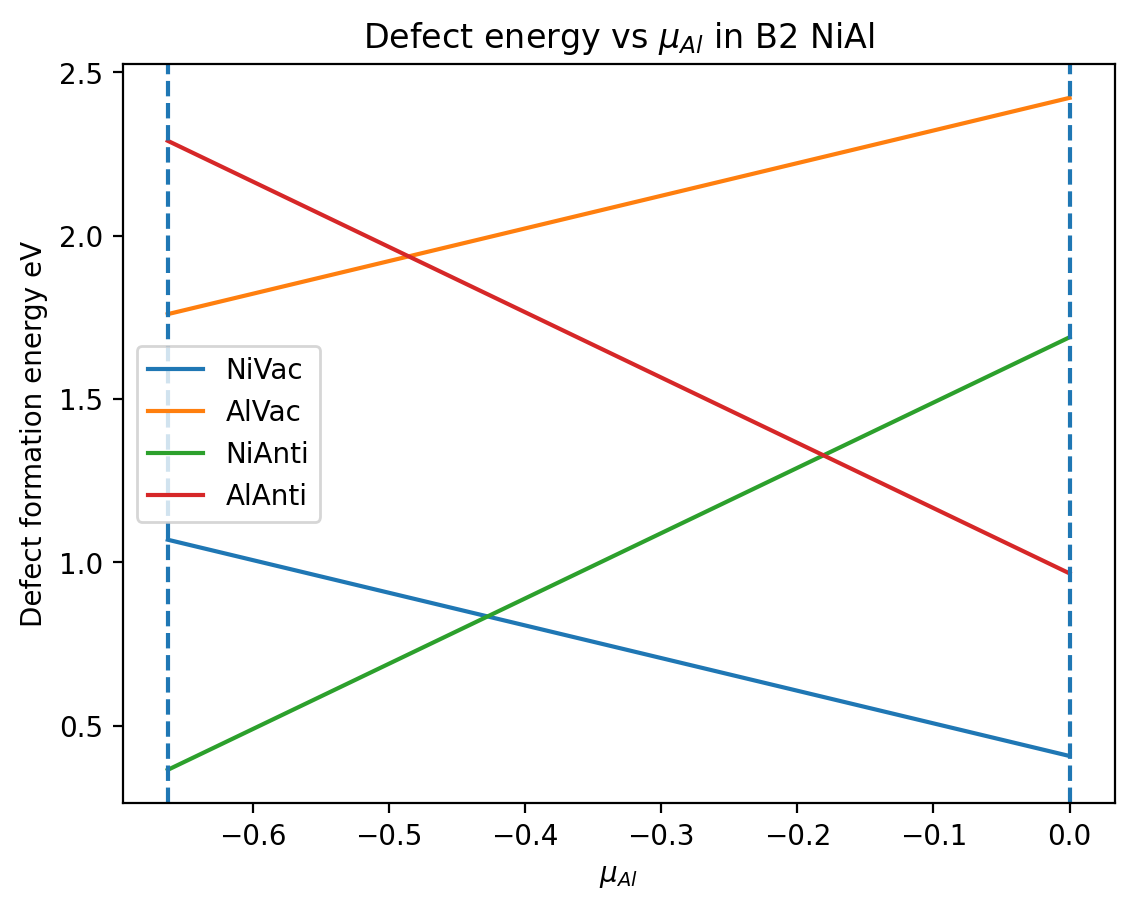

In [14]:
plt.plot(mu_Al, Ef_Nivac, label='NiVac')
plt.plot(mu_Al, Ef_Alvac, label='AlVac')
plt.plot(mu_Al, Ef_Nianti, label='NiAnti')
plt.plot(mu_Al, Ef_Alanti, label='AlAnti')
plt.axvline(0, linestyle='--')
plt.axvline(E_formB2, linestyle='--')
plt.xlabel('$\mu_{Al}$')
plt.ylabel('Defect formation energy eV')
plt.legend()
plt.title('Defect energy vs $\mu_{Al}$ in B2 NiAl');

# Defect concentration of B2 NiAl

In [15]:
T = 1300

In [16]:
conc_Al = get_Al_concentration(get_concentration(Ef_Alvac, T), get_concentration(Ef_Nivac, T), 
                           get_concentration(Ef_Alanti, T), get_concentration(Ef_Nianti, T))

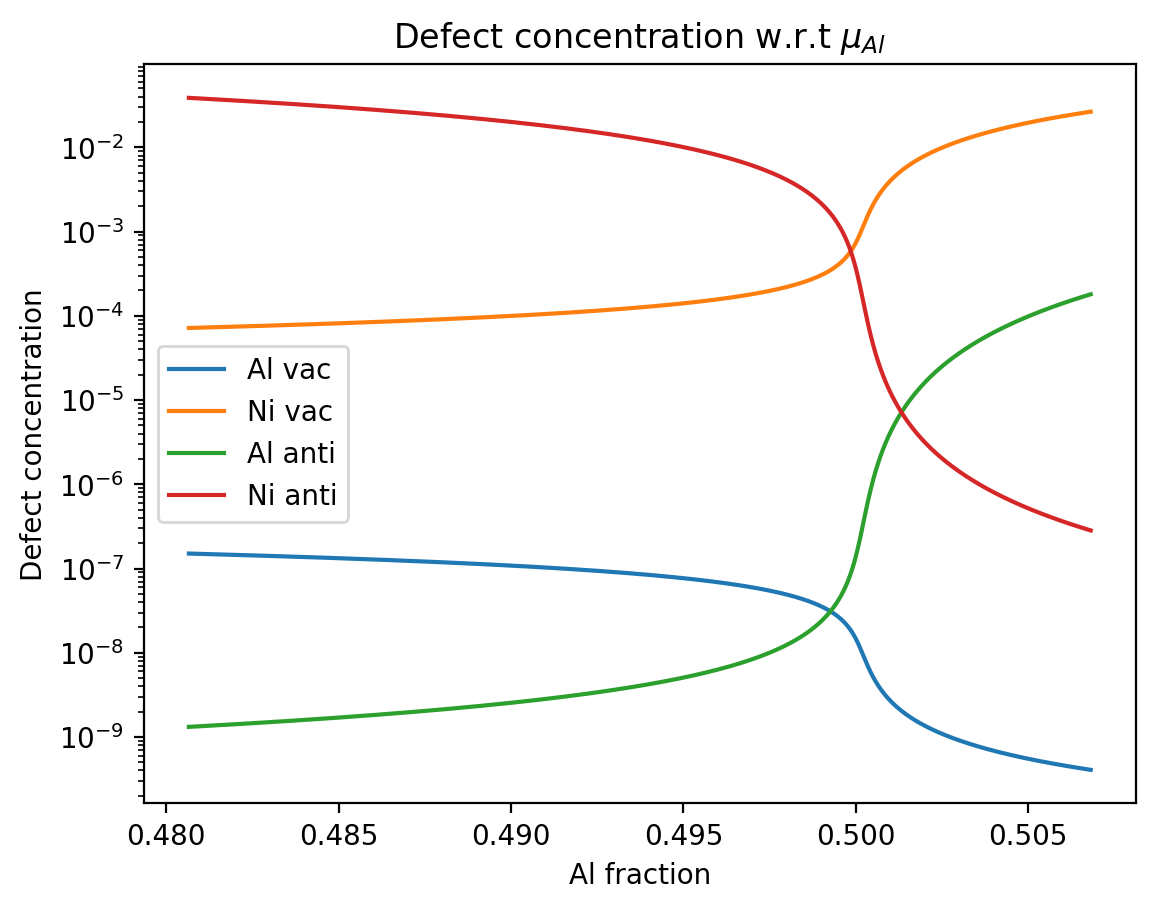

In [17]:
plt.plot(conc_Al, get_concentration(Ef_Alvac, T), label='Al vac')
plt.plot(conc_Al, get_concentration(Ef_Nivac, T), label='Ni vac')
plt.plot(conc_Al, get_concentration(Ef_Alanti, T), label='Al anti')
plt.plot(conc_Al, get_concentration(Ef_Nianti, T), label='Ni anti')
# plt.axhline(1e-3)
plt.xlabel("Al fraction")
plt.ylabel("Defect concentration")
plt.title("Defect concentration w.r.t $\mu_{Al}$")
plt.yscale('log')
plt.legend();

Considering the equation 4(e) from the paper https://www.sciencedirect.com/science/article/pii/S1359645405000406

$$ \frac{1}{2} (1 - 2*C_{Al_{Ni}} + 2*C_{Ni_{Al}} - 2*C_{X_{Ni}} + C_{Va_{Al}} - C_{Va_{Ni}}) = C_{Ni}$$

In [18]:
def get_Ni_concentration(C_AlNi, C_NiAl, C_VaAl, C_VaNi):
    
    return 0.5*(1 - 2*C_AlNi + 2*C_NiAl + C_VaAl - C_VaNi)

In [19]:
conc_Ni = get_Ni_concentration(get_concentration(Ef_Alanti, T), get_concentration(Ef_Nianti, T),
                              get_concentration(Ef_Alvac, T), get_concentration(Ef_Nivac, T))

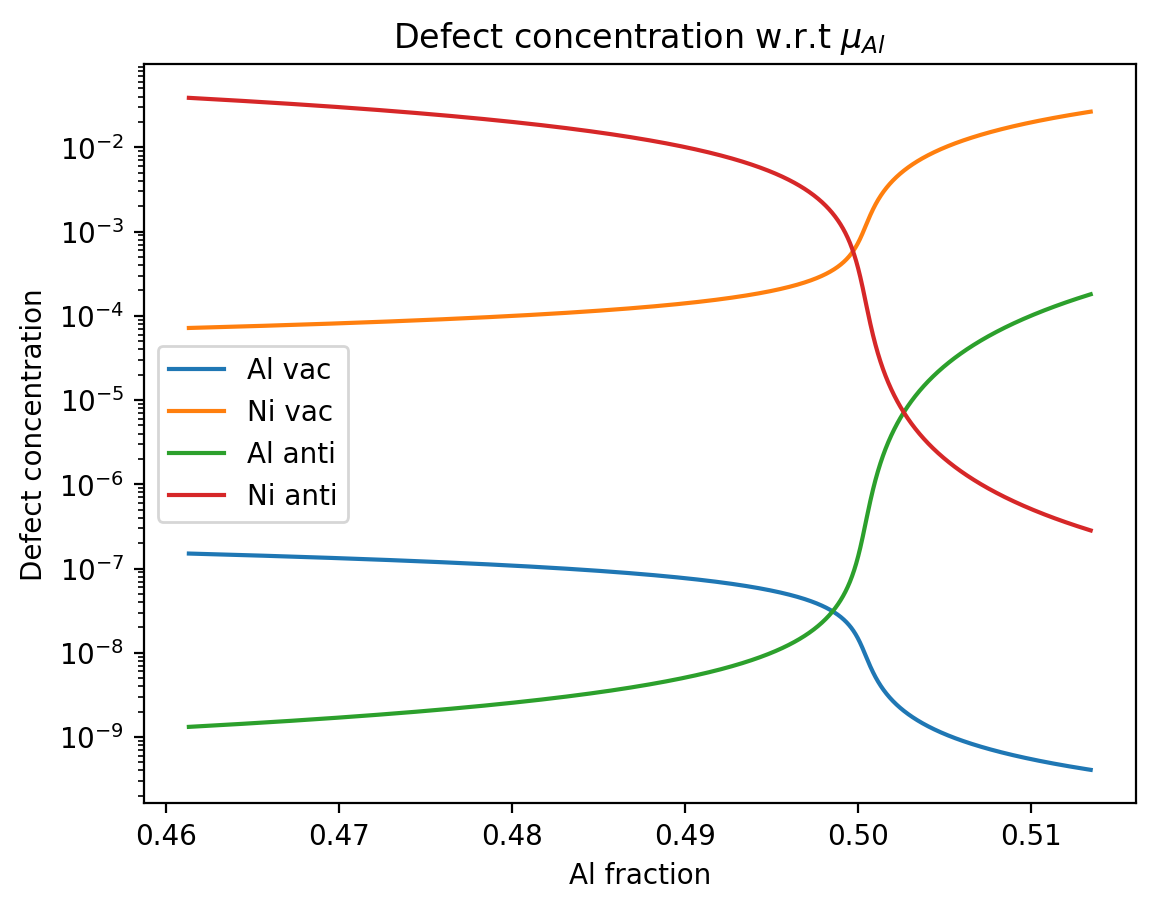

In [20]:
plt.plot(1-conc_Ni, get_concentration(Ef_Alvac, T), label='Al vac')
plt.plot(1-conc_Ni, get_concentration(Ef_Nivac, T), label='Ni vac')
plt.plot(1-conc_Ni, get_concentration(Ef_Alanti, T), label='Al anti')
plt.plot(1-conc_Ni, get_concentration(Ef_Nianti, T), label='Ni anti')
# plt.axhline(1e-3)
plt.xlabel("Al fraction")
plt.ylabel("Defect concentration")
plt.title("Defect concentration w.r.t $\mu_{Al}$")
plt.yscale('log')
plt.legend();

## Comparison of two equations for concentration of Al
- 1st equation --> (See below cell 4)

- 2nd equation is from the paper by C.Jiang et al.

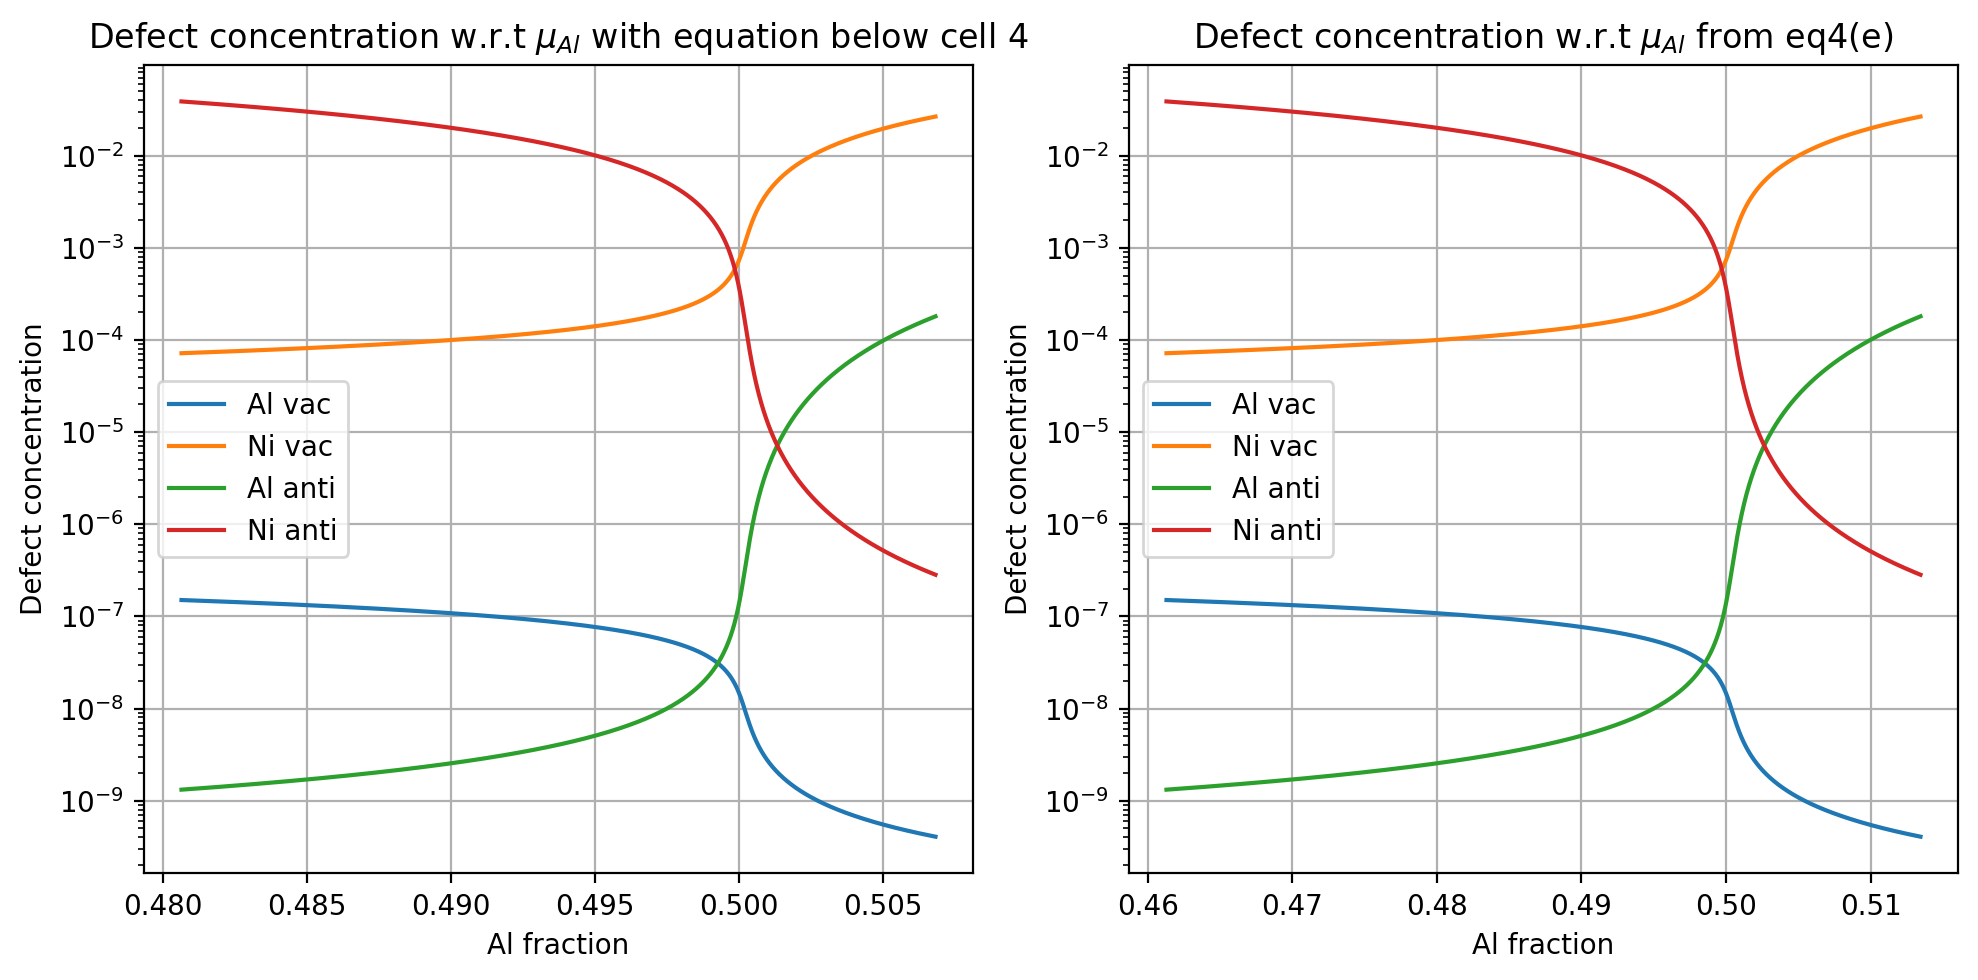

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) # Here you can vary the figure size
ax1.plot(conc_Al, get_concentration(Ef_Alvac, T), label='Al vac')
ax1.plot(conc_Al, get_concentration(Ef_Nivac, T), label='Ni vac')
ax1.plot(conc_Al, get_concentration(Ef_Alanti, T), label='Al anti')
ax1.plot(conc_Al, get_concentration(Ef_Nianti, T), label='Ni anti')
ax1.set_xlabel("Al fraction")
ax1.set_ylabel("Defect concentration")
ax1.set_title("Defect concentration w.r.t $\mu_{Al}$ with equation below cell 4")
ax1.set_yscale('log')
ax1.grid()
ax1.legend()
ax2.plot(1-conc_Ni, get_concentration(Ef_Alvac, T), label='Al vac')
ax2.plot(1-conc_Ni, get_concentration(Ef_Nivac, T), label='Ni vac')
ax2.plot(1-conc_Ni, get_concentration(Ef_Alanti, T), label='Al anti')
ax2.plot(1-conc_Ni, get_concentration(Ef_Nianti, T), label='Ni anti')
ax2.set_xlabel("Al fraction")
ax2.set_ylabel("Defect concentration")
ax2.set_title("Defect concentration w.r.t $\mu_{Al}$ from eq4(e)")
ax2.set_yscale('log')
ax2.grid()
ax2.legend()
plt.tight_layout()
plt.show()

# Plotting defect phase diagram

In [22]:
filename = 'AlNiB2lim.txt'

In [23]:
data = np.loadtxt(filename, delimiter=' ', skiprows=0, dtype=float)

In [24]:
exp_temperature = data[:, 0] + 273

In [25]:
exp_Al_min = 1 - data[:, 1]

In [26]:
exp_Al_max = 1 - data[:, 2]

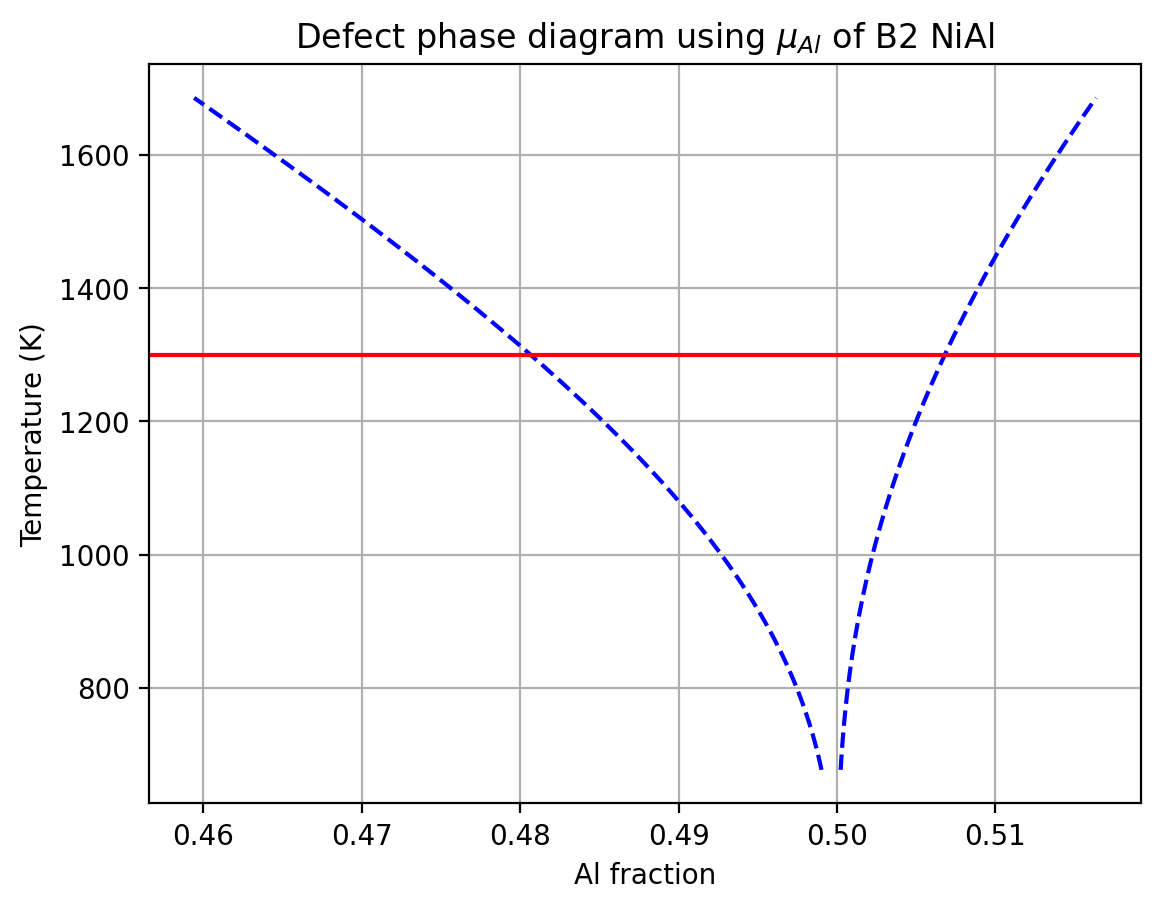

In [27]:
Al_min = []
Al_max = []
for Temp in exp_temperature:
    conc_Al = get_Al_concentration(get_concentration(Ef_Alvac, Temp), get_concentration(Ef_Nivac, Temp), 
                           get_concentration(Ef_Alanti, Temp), get_concentration(Ef_Nianti, Temp))
    Al_min.append(np.min(conc_Al))
    Al_max.append(np.max(conc_Al))

plt.plot(Al_min, exp_temperature, color='blue', linestyle='dashed')
plt.plot(Al_max, exp_temperature, color='blue', linestyle='dashed')
plt.axhline(T, linestyle='-', color='r')
plt.ylabel("Temperature (K)")
plt.xlabel("Al fraction")
plt.grid()
plt.title("Defect phase diagram using $\mu_{Al}$ of B2 NiAl");

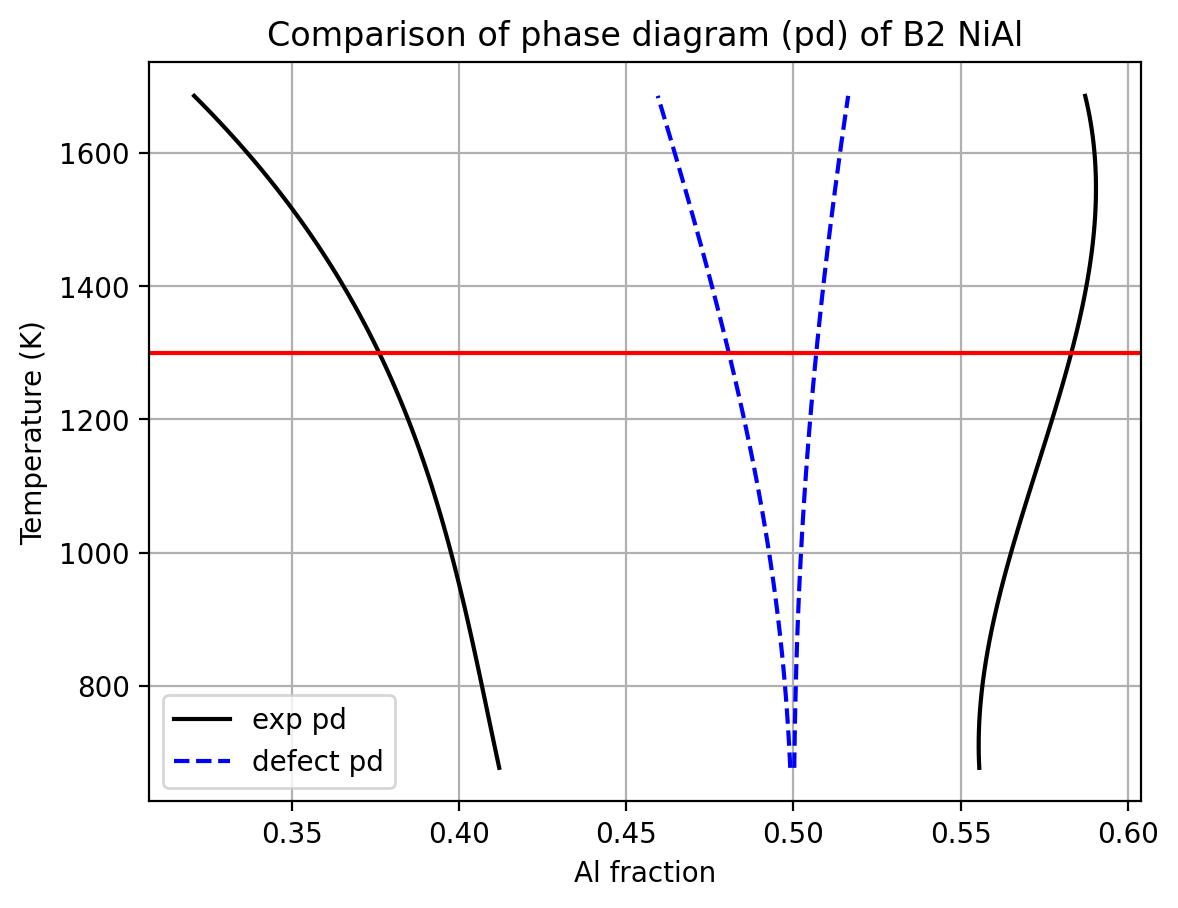

In [28]:
plt.plot(exp_Al_min, exp_temperature, color='black', label='exp pd')
plt.plot(exp_Al_max, exp_temperature, color='black')
plt.plot(Al_min, exp_temperature, color='blue', linestyle='dashed', label='defect pd')
plt.plot(Al_max, exp_temperature, color='blue', linestyle='dashed')
plt.axhline(T, linestyle='-', color='r')
plt.ylabel("Temperature (K)")
plt.xlabel("Al fraction")
plt.grid()
plt.legend()
plt.title("Comparison of phase diagram (pd) of B2 NiAl");

In [29]:
## Kb T ln(C) contribution in gibbs free energy

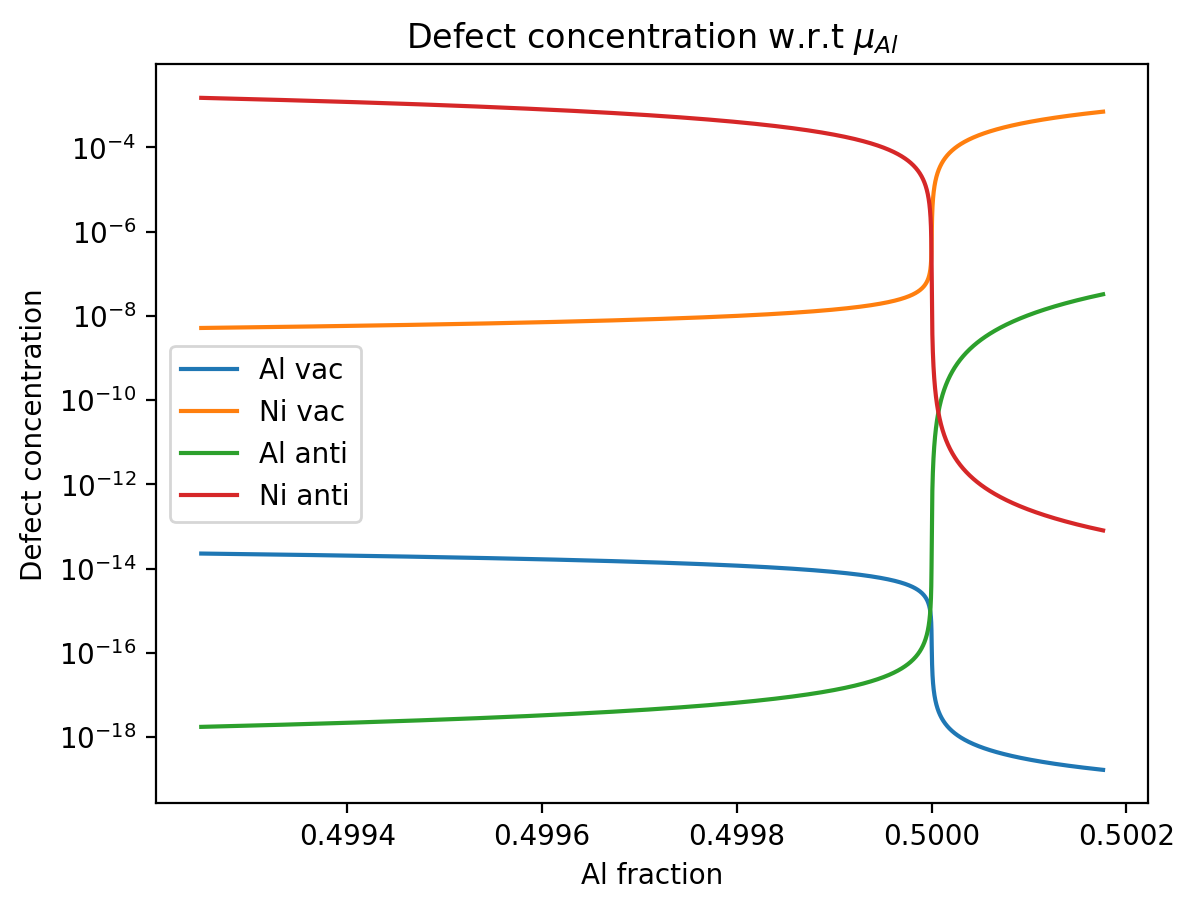

In [30]:
new_EAlVac = Ef_Alvac - Kb*T*np.log(get_concentration(Ef_Alvac, T))

new_ENiVac = Ef_Nivac - Kb*T*np.log(get_concentration(Ef_Nivac, T))

new_EAlAnti = Ef_Alanti - Kb*T*np.log(get_concentration(Ef_Alanti, T))

new_ENiAnti = Ef_Nianti - Kb*T*np.log(get_concentration(Ef_Nianti, T))

new_conc_Al = get_Al_concentration(get_concentration(new_EAlVac, T), get_concentration(new_ENiVac, T), 
                           get_concentration(new_EAlAnti, T), get_concentration(new_ENiAnti, T))

plt.plot(new_conc_Al, get_concentration(new_EAlVac, T), label='Al vac')
plt.plot(new_conc_Al, get_concentration(new_ENiVac, T), label='Ni vac')
plt.plot(new_conc_Al, get_concentration(new_EAlAnti, T), label='Al anti')
plt.plot(new_conc_Al, get_concentration(new_ENiAnti, T), label='Ni anti')
plt.xlabel("Al fraction")
plt.ylabel("Defect concentration")
plt.title("Defect concentration w.r.t $\mu_{Al}$")
plt.yscale('log')
plt.legend();

## Adding other energy contributions : assumption

In [31]:
delta = 0.2 # Adding other contributions

In [32]:
conc_Al = get_Al_concentration(get_concentration(Ef_Alvac-delta, T), get_concentration(Ef_Nivac-delta, T), 
                           get_concentration(Ef_Alanti-delta, T), get_concentration(Ef_Nianti-delta, T))

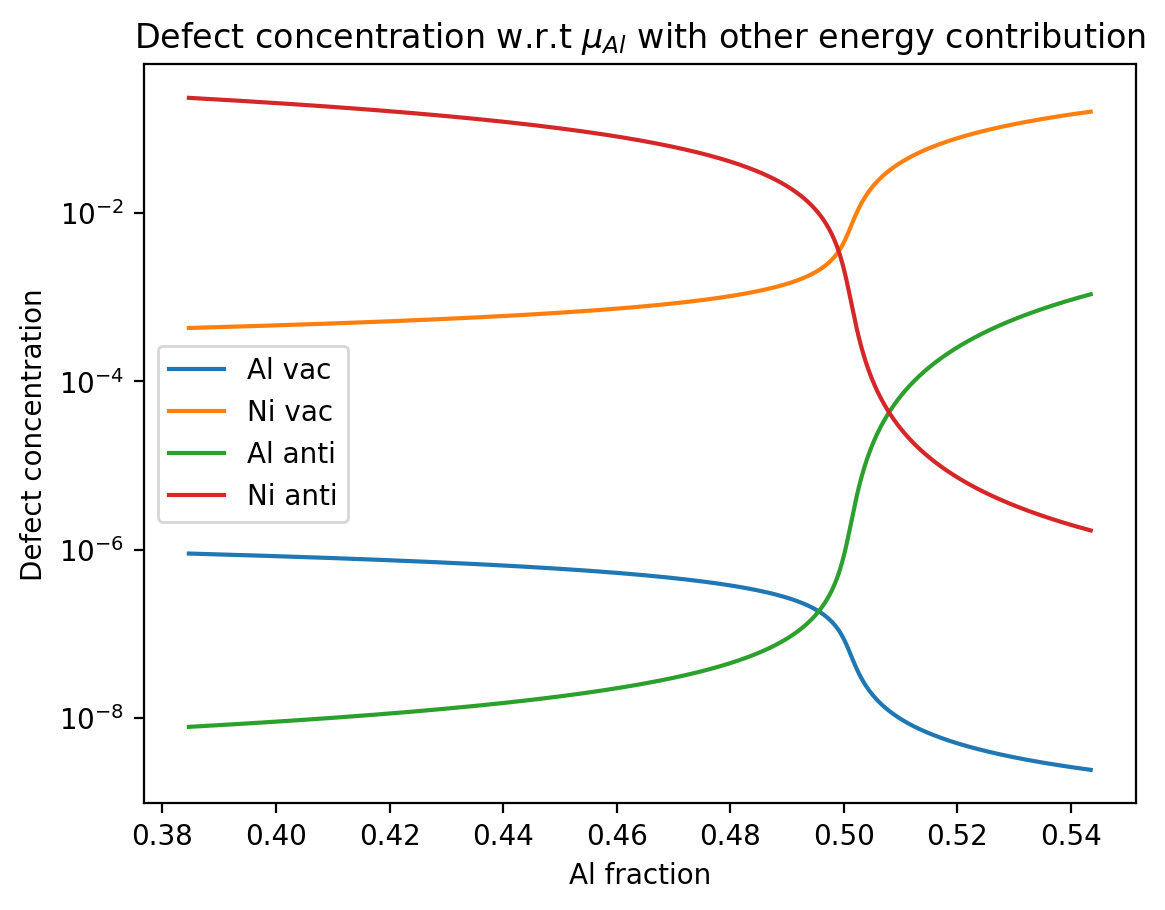

In [33]:
plt.plot(conc_Al, get_concentration(Ef_Alvac-delta, T), label='Al vac')
plt.plot(conc_Al, get_concentration(Ef_Nivac-delta, T), label='Ni vac')
plt.plot(conc_Al, get_concentration(Ef_Alanti-delta, T), label='Al anti')
plt.plot(conc_Al, get_concentration(Ef_Nianti-delta, T), label='Ni anti')
plt.xlabel("Al fraction")
plt.ylabel("Defect concentration")
plt.title("Defect concentration w.r.t $\mu_{Al}$ with other energy contribution")
plt.yscale('log')
plt.legend();

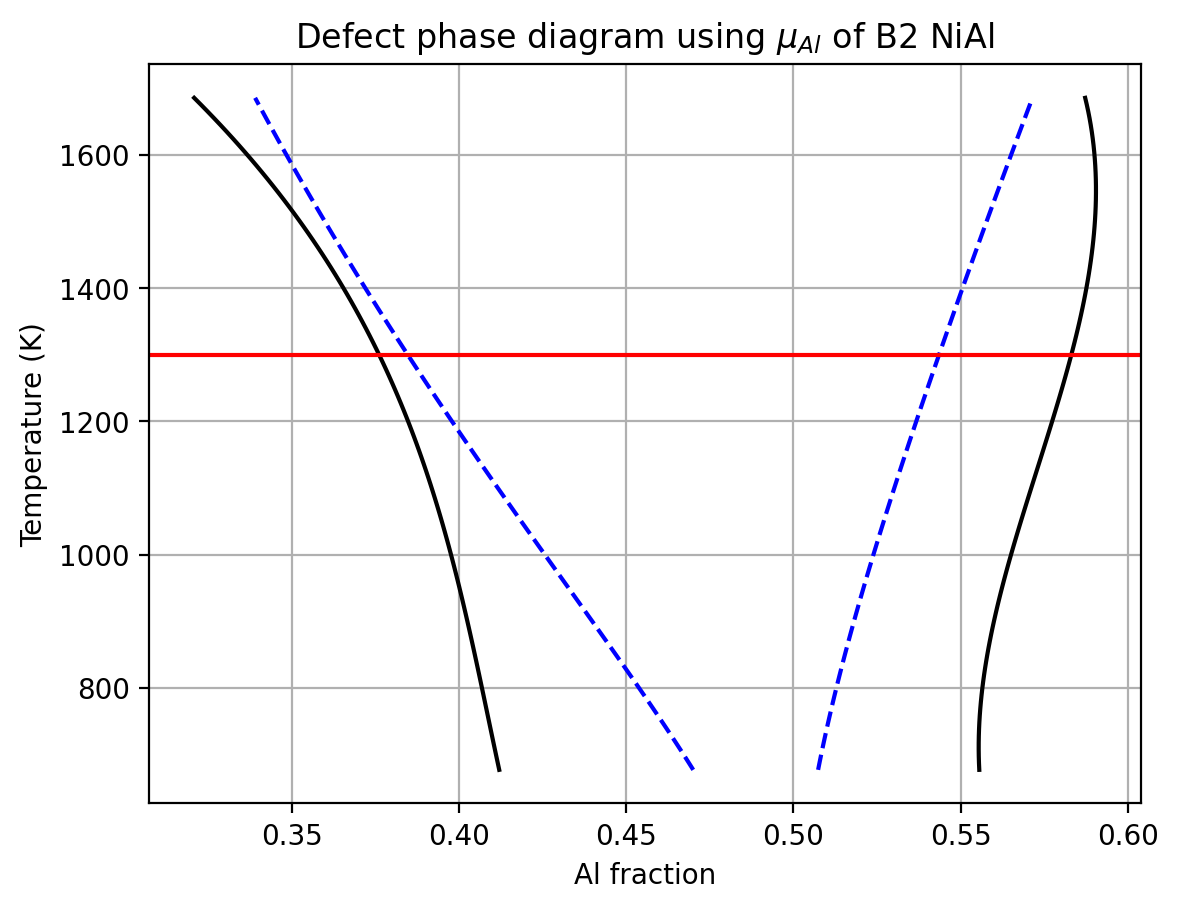

In [34]:
Al_min = []
Al_max = []
for Temp in exp_temperature:
    conc_Al = get_Al_concentration(get_concentration(Ef_Alvac-delta, Temp), get_concentration(Ef_Nivac-delta, Temp), 
                           get_concentration(Ef_Alanti-delta, Temp), get_concentration(Ef_Nianti-delta, Temp))
    Al_min.append(np.min(conc_Al))
    Al_max.append(np.max(conc_Al))

plt.plot(Al_min, exp_temperature, color='blue', linestyle='dashed', label='defect pd')
plt.plot(Al_max, exp_temperature, color='blue', linestyle='dashed')
plt.plot(exp_Al_min, exp_temperature, color='black', label='exp pd')
plt.plot(exp_Al_max, exp_temperature, color='black')
plt.axhline(T, linestyle='-', color='r')
plt.ylabel("Temperature (K)")
plt.xlabel("Al fraction")
plt.grid()
plt.title("Defect phase diagram using $\mu_{Al}$ of B2 NiAl");

# Fritz, Tilmann and Sam discussion


\begin{equation}
    F = U(n_i) - T S(n_i) + (\mu_{Ni} N_{Ni} (n_i) + \mu_{Al} N_{Al} (n_i))
\end{equation}

\begin{equation}
    U(n_i) = \sum_i n_i \varepsilon^f_i 
\end{equation}
i $\in$ ($Va_{Al}$, $Va_{Ni}$, $Ni_{Al}$, $Al_{Ni}$) ; $\varepsilon^f_i$ is the formation energy of the respective defect

\begin{equation}
    S = k_B ln(\Omega_{Ni}\Omega_{Al})    
\end{equation}
Here $k_B$ is the boltzmann constant

\begin{equation}
    \Omega_{Ni} = \frac{N^{sites}_{Ni}!}{(N^{sites}_{Ni} - n_{Va_{Ni}} - n_{Al_{Ni}})! (n_{Va_{Ni}}!n_{Al_{Ni}}!)}    
\end{equation}
\begin{equation}
    \Omega_{Al} = \frac{N^{sites}_{Al}!}{(N^{sites}_{Al} - n_{Va_{Al}} - n_{Ni_{Al}})! (n_{Va_{Al}}!n_{Ni_{Al}}!)}   
\end{equation}

$N^{sites}_{Ni}$ and $N^{sites}_{Al}$ are defined as the total number of Ni or Al sites
\begin{equation}
    N_{Ni}(n_i) = N^{sites}_{Ni} - n_{Va_{Ni}} - n_{Al_{Ni}} + n_{Ni_{Al}} 
\end{equation}
\begin{equation}
    N_{Al}(n_i) = N^{sites}_{Al} - n_{Va_{Al}} - n_{Ni_{Al}} + n_{Al_{Ni}} 
\end{equation}
\begin{equation}
    \frac{\partial F}{\partial n_i} = 0
\end{equation}

\begin{equation}
    C_{Ni} = \frac{N^{sites}_{Ni} - n_{Va_{Ni}} - n_{Al_{Ni}} + n_{Ni_{Al}}}{N^{sites}_{Ni} + N^{sites}_{Al} - (n_{Va_{Ni}} + n_{Va_{Al}})}
\end{equation}
\begin{equation}
    C_{Ni} = \frac{N_{Ni}}{N_{Ni} + N_{Al}}
\end{equation}
\begin{equation}
    C_{Va_{Ni}} = \frac{n_{Va_{Ni}}}{N_{Ni} + N_{Al}}
\end{equation}
\begin{equation}
    C_{Ni_{Al}} = \frac{n_{Ni_{Al}}}{N_{Ni} + N_{Al}}
\end{equation}

\begin{equation}
    U(n_i) = \varepsilon^f_{Va_{Ni}} n_{Va_{Ni}} + \varepsilon^f_{Va_{Al}} n_{Va_{Al}} + \varepsilon^f_{Ni_{Al}} n_{Ni_{Al}} +\varepsilon^f_{Al_{Ni}} n_{Al_{Ni}}
\end{equation}
Partial differentiation will result in the formation energy of the respective defect.
\begin{equation}
    p = N^{sites}_{Ni} - n_{Va_{Ni}} - n_{Al_{Ni}}
\end{equation}  
\begin{equation}
    q = N^{sites}_{Al} - n_{Va_{Al}} - n_{Ni_{Al}}
\end{equation}
\begin{equation}
    p = N_{Ni} - n_{Ni_{Al}}
\end{equation}  
\begin{equation}
    q = N_{Al} - n_{Al_{Ni}}
\end{equation}
\begin{equation}
    S(n_i) = k_B (N^{sites}_{Ni} ln(N^{sites}_{Ni}) + N^{sites}_{Al} ln(N^{sites}_{Al}) - p ln(p) - q ln(q) - n_{Va_{Ni}}ln(n_{Va_{Ni}}) - n_{Va_{Al}}ln(n_{Va_{Al}}) - n_{Ni_{Al}} ln(n_{Ni_{Al}}) - n_{Al_{Ni}}ln(n_{Al_{Ni}}))
\end{equation}
Partial differentiation of eq 12 will result $k_B$(ln(p or q) - ln(defect)). Basically ln(p) for $n_{Va_{Ni}}$, $n_{Al_{Ni}}$ and ln(q) for $n_{Va_{Al}}$ , $n_{Ni_{Al}}$

So the final equation looks like this:

\begin{equation}
    \frac{\partial F}{\partial n_{Va_{Ni}}} = \varepsilon^f_{Va_{Ni}} - k_B T ln(\frac{N_{Ni} - n_{Ni_{Al}}}{n_{Va_{Ni}}}) - \mu_{Ni} 
\end{equation}
\begin{equation}
    \frac{\partial F}{\partial n_{Va_{Al}}} = \varepsilon^f_{Va_{Al}} - k_B T ln(\frac{N_{Al - n_{Al_{Ni}}}}{n_{Va_{Al}}}) - \mu_{Al} 
\end{equation}
\begin{equation}
    \frac{\partial F}{\partial n_{Ni_{Al}}} = \varepsilon^f_{Ni_{Al}} - k_B T ln(\frac{N_{Ni} - n_{Ni_{Al}}}{n_{Ni_{Al}}}) + \mu_{Ni} - \mu_{Al} 
\end{equation}
\begin{equation}
    \frac{\partial F}{\partial n_{Al_{Ni}}} = \varepsilon^f_{Al_{Ni}} - k_B T ln(\frac{N_{Al - n_{Al_{Ni}}}}{n_{Al_{Ni}}}) - \mu_{Ni} + \mu_{Al}
\end{equation}

Replacing $n_{defect}$ by $c_{defect}$:

\begin{equation}
    \frac{\partial F}{\partial n_{Va_{Ni}}} = \varepsilon^f_{Va_{Ni}} - k_B T ln(\frac{C_{Ni} - C_{Ni_{Al}}}{C_{Va_{Ni}}}) - \mu_{Ni} 
\end{equation}
\begin{equation}
    \frac{\partial F}{\partial n_{Va_{Al}}} = \varepsilon^f_{Va_{Al}} - k_B T ln(\frac{C_{Al - C_{Al_{Ni}}}}{C_{Va_{Al}}}) - \mu_{Al} 
\end{equation}
\begin{equation}
    \frac{\partial F}{\partial n_{Ni_{Al}}} = \varepsilon^f_{Ni_{Al}} - k_B T ln(\frac{C_{Ni} - C_{Ni_{Al}}}{C_{Ni_{Al}}}) + \mu_{Ni} - \mu_{Al} 
\end{equation}
\begin{equation}
    \frac{\partial F}{\partial n_{Al_{Ni}}} = \varepsilon^f_{Al_{Ni}} - k_B T ln(\frac{C_{Al - C_{Al_{Ni}}}}{C_{Al_{Ni}}}) - \mu_{Ni} + \mu_{Al}
\end{equation}
\begin{equation}
    C_{Ni} + C_{Al} - 1 = 0
\end{equation}
Considering only Ni antisites in the system.
\begin{equation}
    N_{Al} + n_{Ni_{Al}} = N_{Ni} - n_{Ni_{Al}}
\end{equation}
Considering Ni and Al antisites in the system.
\begin{equation}
    N_{Al} + n_{Ni_{Al}} - n_{Al_{Ni}} = N_{Ni} - n_{Ni_{Al}} + n_{Al_{Ni}}
\end{equation}
Considering all defects like Ni and Al antisites and vacancies in the system.
\begin{equation}
    N_{Al} + n_{Ni_{Al}} - n_{Al_{Ni}} + n_{Va_{Al}} = N_{Ni} - n_{Ni_{Al}} + n_{Al_{Ni}} + n_{Va_{Ni}}
\end{equation}
Dividing $N_{Ni} + N_{Al}$ on the both sides of the equation.
\begin{equation}
    C_{Al} + 2 C_{Ni_{Al}} + C_{Va_{Al}} = C_{Ni} + 2 C_{Al_{Ni}} + C_{Va_{Ni}}
\end{equation}


Let;
\begin{equation}
    A1 = e^{\frac{-(\varepsilon^f_{Va_{Ni}}- \mu_{Ni})}{k_B T}}
\end{equation}
\begin{equation}
    A2 = e^{\frac{-(\varepsilon^f_{Va_{Al}} - \mu_{Al})}{k_B T}}
\end{equation}
\begin{equation}
    A3 = e^{\frac{-(\varepsilon^f_{Ni_{Al}} + \mu_{Ni} - \mu_{Al})}{k_B T}}
\end{equation}
\begin{equation}
    A4 = e^{\frac{-(\varepsilon^f_{Al_{Ni}} - \mu_{Ni} + \mu_{Al})}{k_B T}}
\end{equation}


- So the final 6 equations looks like:

\begin{equation}
     C_{Va_{Ni}}  = \frac{C_{Ni} A3}{A1 (1 + A3)}
     \label{eq1}
\end{equation}
\begin{equation}
    C_{Va_{Al}} = \frac{C_{Al} A4}{A2 (1 + A4)}
    \label{eq2}
\end{equation}
\begin{equation}
    C_{Ni_{Al}} =  \frac{C_{Ni}}{1 + A3}  
    \label{eq3}
\end{equation}
\begin{equation}
    C_{Al_{Ni}} = \frac{C_{Al}}{1 + A4}
    \label{eq4}
\end{equation}
\begin{equation}
    C_{Ni} + C_{Al} - 1 = 0
    \label{eq5}
\end{equation}
\begin{equation}
    C_{Al} + 2 C_{Ni_{Al}} + C_{Va_{Al}} = C_{Ni} + 2 C_{Al_{Ni}} + C_{Va_{Ni}}
    \label{eq6}
\end{equation}


- Substituting the concentration of defects from equation \ref{eq1} to \ref{eq4} in \ref{eq6}; we get

\begin{equation}
    C_{Al} (1 + \frac{A4}{A2 (1 + A4)} - \frac{2}{1 + A4}) - C_{Ni} (1 + \frac{A3}{A1 (1 + A3)} - \frac{2}{1 + A3}) = 0
    \label{eq7}
\end{equation}

- Multiplying $(1 + \frac{A3}{A1 (1 + A3)} - \frac{2}{1 + A3})$ to equation \ref{eq5} and subtracting it to equation \ref{eq7}; we get

\begin{equation}
    C_{Al} = \frac{(A3 - 2A1 + A1(1 + A3))A2(1 + A4)}{2A1A2(1 + A3)(1 + A4) + (A3 - 2A1)(A2(1 + A4)) + (A4 - 2A2)(A1(1 + A3))}
    \label{eq8}
\end{equation}

In [35]:
def get_entropy_included_concentration():
    
    A1 = np.exp(-(Ef_Nivac - mu_Ni) / (Kb*T))
    A2 = np.exp(-(Ef_Alvac - mu_Al) / (Kb*T))
    A3 = np.exp(-(Ef_Nianti + mu_Ni - mu_Al) / (Kb*T))
    A4 = np.exp(-(Ef_Alanti - mu_Ni + mu_Al) / (Kb*T))
    
    C_Al = (A3 - 2*A1 + A1*(1 + A3))*(A2*(1 + A4)) / ((2*A1*A2*(1 + A3)*(1 + A4)) + (A3 - 2*A1)*(A2*(1 + A4)) + (A4 - 2*A2)*(A1*(1+ A3)))
    C_Ni = 1 - C_Al
    C_NiAl = C_Ni / (1 + A3)
    C_AlNi = C_Al / (1 + A4)
    C_VaNi = (C_Ni - C_NiAl) / A1
    C_VaAl = (C_Al - C_AlNi) / A2
                                  
    return C_VaNi, C_VaAl, C_NiAl, C_AlNi, C_Ni, C_Al

In [36]:
y_VaNi, y_VaAl, y_NiAl, y_AlNi, y_Ni, y_Al = get_entropy_included_concentration()

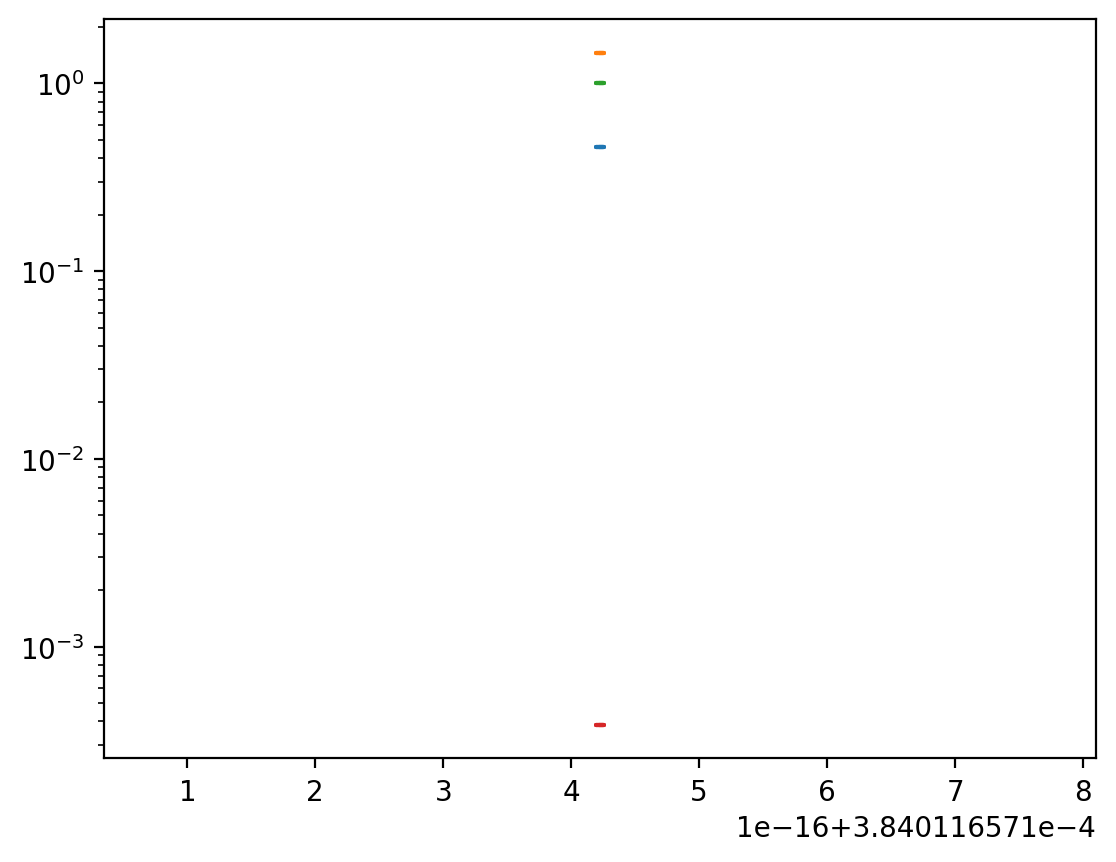

In [37]:
plt.plot(y_Al, y_VaAl)
plt.plot(y_Al, y_VaNi)
plt.plot(y_Al, y_NiAl)
plt.plot(y_Al, y_AlNi)
plt.yscale('log');

## Taking mean field approximation

\begin{equation}
    S = k_B (1 + C_{Va_{Ni}} + C_{Va_{Al}}) ln(\frac{1 + C_{Va_{Ni}} + C_{Va_{Al}}}{2}) - k_B \sum_i C_i ln (C_i )
\end{equation}    

Equations from the paper : https://www.sciencedirect.com/science/article/pii/S1359645405000406?ref=cra_js_challenge&fr=RR-1

In [38]:
# mu_Pt = 0.5 # Some random number

# # Pt on Ni with respect to chemical potential: Supercell energy - defect free energy - mu_Pt + mu_Ni

# Ef_PtonNi = get_box_energy(Energy_tot_PtonNi, i='PtonNi') - get_box_energy(64*EnergyB2, i='Bulk') - mu_Pt + mu_Ni 

# # Pt on Al with respect to chemical potential: Supercell energy - defect free energy - mu_Pt + mu_Al

# Ef_PtonAl = get_box_energy(Energy_tot_PtonNi, i='PtonAl') - get_box_energy(64*EnergyB2, i='Bulk') - mu_Pt + mu_Al 

In [39]:
NiAl_exp1 = np.exp(-(Ef_Alanti - Ef_Nivac + Ef_Alvac) / (Kb*T))
NiAl_exp2 = np.exp(-(Ef_Nianti + Ef_Nivac - Ef_Alvac) / (Kb*T))
# NiAl_exp3 = np.exp(-(Ef_PtonAl - Ef_PtonNi - Ef_Alvac + Ef_Nivac) / (Kb*T))
NiAl_exp4 = np.exp(-(Ef_Nivac + Ef_Alvac) / (Kb*T))

In [40]:
def defect_concentration_B2NiAl_function(vars, yNi):
    """
    C_vacAl = a
    C_vacNi = b
    C_AlNi = c
    C_NiAl = d
    C_PtAl = e
    C_PtNi = f
    """

    a, b, c, d = vars
    e, f = 0.0, 0.0
    return [2*a*c - (b*(1 - 2*d - 2*e - a + b)) * np.mean(NiAl_exp1), 2*b*d - (a*(1 - 2*c - 2*f + a + b)) * np.mean(NiAl_exp2),
            4*a*b - (1 + a + b)**2 * np.mean(NiAl_exp4), (1 - 2*c + 2*d - 2*f + a - b) - 2*yNi ] 

In [41]:
def solver_B2NiAl(yNi, values):
    
    return fsolve(defect_concentration_B2NiAl_function, values, args=yNi, xtol = 1e-11, maxfev=10000)

In [42]:
y_B2Ni_linspace = np.linspace(.6, .45, len(mu_Al))
xx = 1 - y_B2Ni_linspace # Al mole fraction for B2 NiAl

In [43]:
# Solving the system of non-linear equation 
#         a     b      c     d    
prev0 = [2e-6, 3e-4, 1e-10, 0.1] # First estimate where F(x) = 0 
ans0 = []

for i in range(len(y_B2Ni_linspace)):
    prev0 = solver_B2NiAl(y_B2Ni_linspace[i], prev0)
    ans0.append(prev0)
ans0 = np.array(ans0)

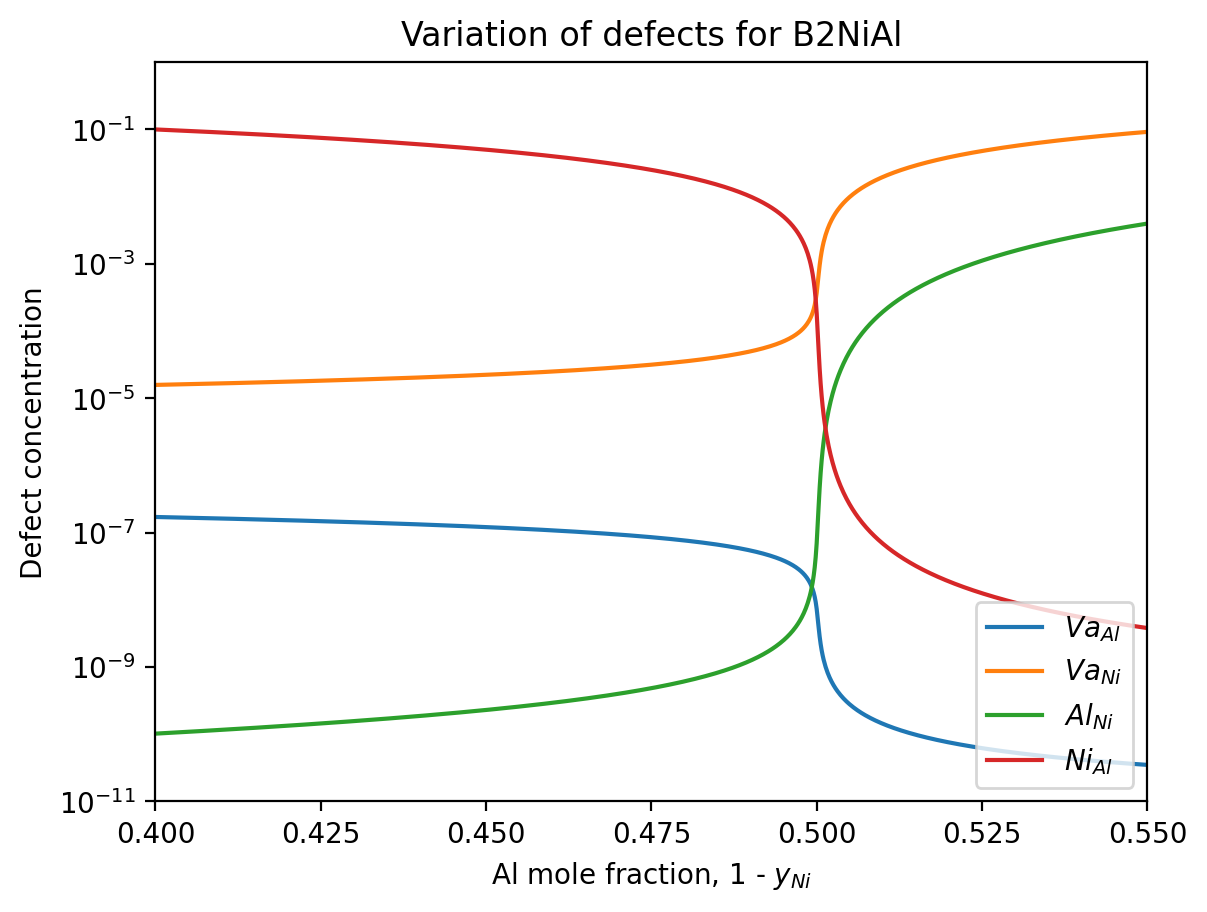

In [44]:
# Variation of defects at 1300K for B2NiAl.
plt.plot(xx, ans0)
plt.yscale('log')
plt.xlim([0.4, .55])
plt.ylim([1e-11, 1])
plt.xticks(np.arange(0.4, 0.55, 0.025))
plt.ylabel("Defect concentration")
plt.xlabel("Al mole fraction, 1 - $y_{Ni}$")
plt.legend(["$Va_{Al}$", "$Va_{Ni}$", "$Al_{Ni}$", "$Ni_{Al}$"], loc="lower right")
plt.title("Variation of defects for B2NiAl");

### Plotting the values of my calculated B2NiAl used in my project-work

In [45]:
import csv

# Specify the file path and name for the CSV file
file_path = '/cmmc/u/avishwakarma/Aditya_trial/B2NiAl_data.csv'

# Read the CSV file
with open(file_path, 'r') as file:
    reader = csv.reader(file)
    data_list = list(reader)

# Convert the data list to a NumPy array
data = np.array(data_list)

# Print the NumPy array
print(data)

[['Al concentration' 'Vacancy Al' 'Vacancy Ni' 'Al antisite'
  'Ni antisite']
 ['0.4' '3.2928381106504917e-06' '0.000303493600476238'
  '1.019624211100697e-10' '0.10015010048315771']
 ['0.4001668520578421' '3.290096516349571e-06' '0.0003037466497365921'
  '1.0218000843243531e-10' '0.09998337632094809']
 ...
 ['0.5496662958843159' '1.215346193132984e-08' '0.09931024194601752'
  '1.2422393812288925e-05' '1.2414057741549387e-06']
 ['0.549833147942158' '1.2120132693168743e-08' '0.09964377210515772'
  '1.250218134242987e-05' '1.2342316968982289e-06']
 ['0.55' '1.2087028086267538e-08' '0.09997730193857288'
  '1.2582200471163964e-05' '1.2271262434674109e-06']]


In [46]:
Defect_concentration = []
Al_concentration = data[1:,0].astype(float)

In [47]:
for i in range(1,data.shape[0]):
    Defect_concentration.append([data[i,1].astype(float), data[i,2].astype(float), data[i,3].astype(float), data[i,4].astype(float)])

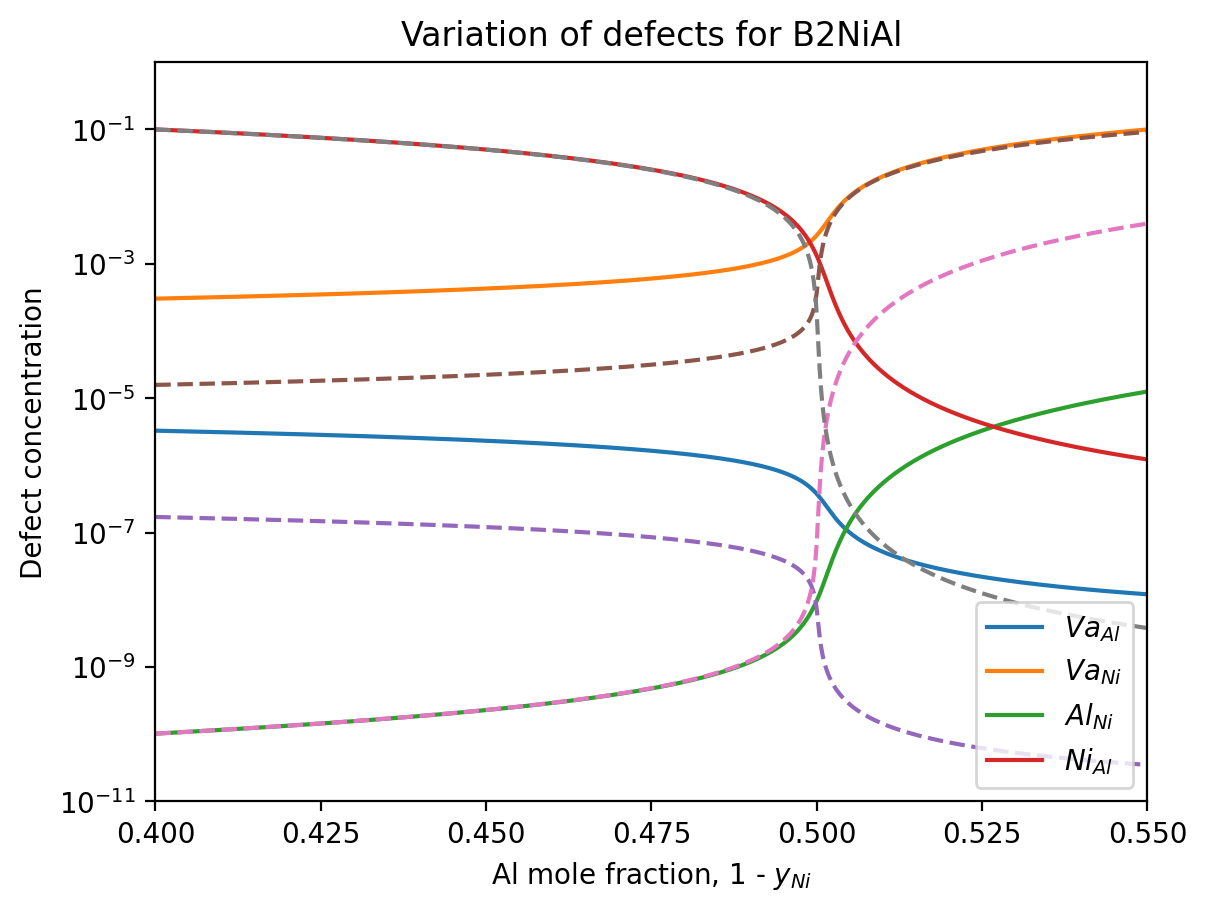

In [48]:
plt.plot(Al_concentration, Defect_concentration)
plt.plot(xx, ans0, linestyle='--')
# plt.plot(1-conc_Ni, get_concentration(Ef_Alvac, T), label='Al vac', linestyle='--')
# plt.plot(1-conc_Ni, get_concentration(Ef_Nivac, T), label='Ni vac', linestyle='--')
# plt.plot(1-conc_Ni, get_concentration(Ef_Alanti, T), label='Al anti', linestyle='--')
# plt.plot(1-conc_Ni, get_concentration(Ef_Nianti, T), label='Ni anti', linestyle='--')
# plt.plot(conc_Al, get_concentration(Ef_Alvac, T), label='Al vac', marker='*')
# plt.plot(conc_Al, get_concentration(Ef_Nivac, T), label='Ni vac', marker='*')
# plt.plot(conc_Al, get_concentration(Ef_Alanti, T), label='Al anti', marker='*')
# plt.plot(conc_Al, get_concentration(Ef_Nianti, T), label='Ni anti', marker='*')
plt.yscale('log')
plt.xlim([0.4, .55])
plt.ylim([1e-11, 1])
plt.xticks(np.arange(0.4, 0.55, 0.025))
plt.ylabel("Defect concentration")
plt.xlabel("Al mole fraction, 1 - $y_{Ni}$")
plt.legend(["$Va_{Al}$", "$Va_{Ni}$", "$Al_{Ni}$", "$Ni_{Al}$"], loc="lower right")
plt.title("Variation of defects for B2NiAl");

In [49]:
# def partial_functions(vars, i):
#     """
#     C1 = Concentration of Ni vacancy
#     C2 = Concentration of Al vacancy
#     C3 = Concentration of Ni antisite
#     C4 = Concentration of Al antisite
#     C_Ni = Concentration of Ni
#     C_Al = Concentration of Al
#     """
    
#     C1, C2, C3, C4, C_Ni, C_Al = vars

#     return [Ef_Nivac[i] - Kb*T*np.log((C_Ni - C3) / C1) - mu_Ni[i], Ef_Alvac[i] - Kb*T*(np.log((C_Al - C4) / C2)) - mu_Al[i], 
#             Ef_Nianti[i] + Kb*T*np.log((C_Ni - C3) / C3) + mu_Ni[i] - mu_Al[i], Ef_Alanti[i] + Kb*T*(np.log((C_Al - C4) / C4)) - mu_Ni[i] + mu_Al[i],
#             C_Ni + C_Al - 1, C_Al + 2*C3 + C2 - C_Ni - 2*C4 - C1]

In [50]:
# def solver(i, x0):
    
#     return fsolve(partial_functions, x0, args=i)

In [51]:
# , Ef_Alvac + Kb*T*(1 + np.log(n2)) - mu_Al, 
#             Ef_Nianti + Kb*T*(1 + np.log(n3)) + mu_Ni - mu_Al, Ef_Alanti + Kb*T*(1 + np.log(n4)) + mu_Al - mu_Ni

In [52]:
# # Solving the system of non-linear equation 
# #         C1    C2   C3    C4   C_Ni  C_Al
# prev0 = [2e-5, 3e-10, 1e-9, 1e-05, 0.65, 0.35] # First estimate where F(x) = 0 
# ans0 = []

# for i in range(len(mu_Al)):
#     prev0 = solver(i, prev0)
#     ans0.append(prev0)
# ans0 = np.array(ans0)

In [53]:
# Ef_Alvac[0] - Kb*T*np.log((0.35 - 1e-05) / 3e-10) - mu_Al[0]

In [54]:
# plt.plot(ans0)
# plt.yscale('log');

In [55]:
# # Setting bounds for the concentration of defects and concentration of Ni and Al

# cmin = 1e-15
# cmax = 5e-01
# conc_min = 0.25
# conc_max = 0.75

# bounds = ((cmin, cmax), (cmin, cmax), (cmin, cmax), (cmin, cmax), (conc_min, conc_max), (conc_min, conc_max))

In [56]:
# # Solving the system of non-linear equation 
# #         C1    C2   C3    C4   C_Ni  C_Al
# prev0 = [2e-5, 3e-10, 1e-9, 1e-05, 0.65, 0.35] # First estimate where F(x) = 0 
# ans0 = []

# for i in range(len(mu_Al)):
#     result = optimize.minimize(partial_functions, prev0, args=i, bounds=bounds)
#     prev0 = result.x
#     ans0.append(prev0)
# ans0 = np.array(ans0)

In [57]:
# Solving analytically

In [58]:
# A1 = np.exp(-(Ef_Nivac - mu_Ni) / (Kb*T))
# A2 = np.exp(-(Ef_Alvac - mu_Al) / (Kb*T))
# A3 = np.exp(-(Ef_Nianti + mu_Ni - mu_Al) / (Kb*T))
# A4 = np.exp(-(Ef_Alanti - mu_Ni + mu_Al) / (Kb*T))

# Defect energetics of B2 NiAl + 10%Pt

In [59]:
def get_10Ptbox_energy(tot, i, Ni_bulk = Ni_bulk, Al_bulk = Al_bulk, Pt_bulk = Pt_bulk):
    """
    Returns supercell energy - n_Ni * Ni_Bulk - n_Al * Al_bulk -n_Pt * Pt_bulk
    
    """
    if i == 'Nivac':
        n_Ni = 50
        n_Al = 64
        n_Pt = 13
    if i == 'Alvac':
        n_Ni = 51
        n_Al = 63
        n_Pt = 13
    if i == 'Ptvac':
        n_Ni = 51
        n_Al = 64
        n_Pt = 12
    if i == 'Nianti':
        n_Ni = 52
        n_Al = 63
        n_Pt = 13
    if i == 'Alanti':
        n_Ni = 50
        n_Al = 65
        n_Pt = 13
    if i == 'PtonNi':
        n_Ni = 50
        n_Al = 64
        n_Pt = 14
    if i == 'PtonAl':
        n_Ni = 51
        n_Al = 63
        n_Pt = 14
    if i == 'Bulk':
        n_Ni = 51
        n_Al = 64
        n_Pt = 13
    return tot - n_Ni * Ni_bulk - n_Al * Al_bulk - n_Pt * Pt_bulk

$$y_{Pt_{Ni}} + y_{Pt_{Al}} = y_{Pt} $$
$$ y_{Pt} = 0.1$$
$$e^-\frac{E^f_{Pt_{Ni}}}{k_B T} + e^-\frac{E^f_{Pt_{Al}}}{k_B T} = 0.1$$

$$\frac{E^f_{Pt_{Ni}}}{k_B T} + \frac{E^f_{Pt_{Al}}}{k_B T} = -ln(0.1)$$
$$E^f_{Pt_{Ni}} + E^f_{Pt_{Al}} = -k_B T ln(0.1)$$
$$E^f_{Pt_{Ni}} = <E^{box}_{Pt_{Ni}}> - [E^{box}_{B2NiAl10Pt}] + \mu_{Ni} - \mu_{Pt} $$
$$E^f_{Pt_{Al}} = <E^{box}_{Pt_{Al}}> - [E^{box}_{B2NiAl10Pt}] + \mu_{Al} - \mu_{Pt} $$

$$<E^{box}_{Pt_{Ni}}> + <E^{box}_{Pt_{Al}}> - 2[E^{box}_{B2NiAl10Pt}] - 2\mu_{Pt} + E^f_{B2NiAl} = -k_B T ln(0.1) $$

$$\mu_{Pt} = \frac{1}{2} [<E^{box}_{Pt_{Ni}}> + <E^{box}_{Pt_{Al}}> - 2[E^{box}_{B2NiAl10Pt}] + k_B T ln(0.1) + E^f_{B2NiAl}] $$

In [60]:
mu_Pt = 0.5 * (get_10Ptbox_energy(EPt_PtonNi, 'PtonNi') + get_10Ptbox_energy(EPt_PtonAl, 'PtonAl') 
              - 2*get_10Ptbox_energy(total_E10PtB2NiAl, 'Bulk') + Kb * T * np.log(0.1) + E_formB2)

In [61]:
# Ni vacancy with respect to chemical potential

EfPt_Nivac = get_10Ptbox_energy(EPt_Ni_vac, i='Nivac') - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') + mu_Ni

In [62]:
# Al vacancy with respect to chemical potential

EfPt_Alvac = get_10Ptbox_energy(EPt_Al_vac, i='Alvac') - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') + mu_Al

In [63]:
# Pt vacancy with respect to chemical potential

EfPt_Ptvac = get_10Ptbox_energy(EPt_Pt_vac, i='Ptvac') - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') + mu_Pt

In [64]:
# Ni antisite with respect to chemical potential

EfPt_Nianti = get_10Ptbox_energy(EPt_Ni_anti, i='Nianti') - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') - mu_Ni + mu_Al

In [65]:
# Al antisite with respect to chemical potential

EfPt_Alanti = get_10Ptbox_energy(EPt_Al_anti, i='Alanti') - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') + mu_Ni - mu_Al

In [66]:
# Pt on Ni sub-lattice with respect to chemical potential

EfPt_PtonNi = get_10Ptbox_energy(EPt_PtonNi, i='PtonNi') - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') - mu_Pt + mu_Ni

In [67]:
# Pt on Al sub-lattice with respect to chemical potential

EfPt_PtonAl = get_10Ptbox_energy(EPt_PtonAl, i='PtonAl') - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') - mu_Pt + mu_Al

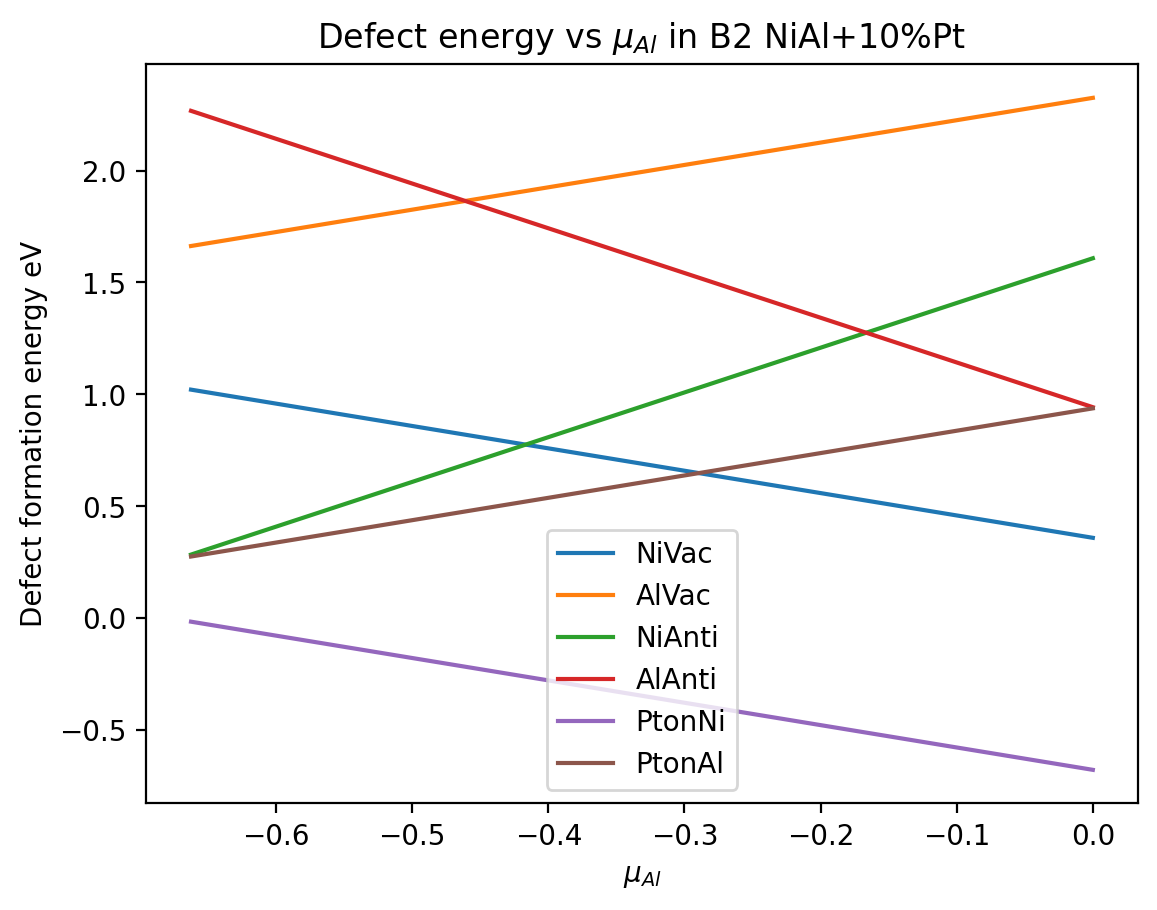

In [68]:
plt.plot(mu_Al, EfPt_Nivac, label='NiVac')
plt.plot(mu_Al, EfPt_Alvac, label='AlVac')
plt.plot(mu_Al, EfPt_Nianti, label='NiAnti')
plt.plot(mu_Al, EfPt_Alanti, label='AlAnti')
plt.plot(mu_Al, EfPt_PtonNi, label='PtonNi')
plt.plot(mu_Al, EfPt_PtonAl, label='PtonAl')
plt.xlabel('$\mu_{Al}$')
plt.ylabel('Defect formation energy eV')
plt.legend()
plt.title('Defect energy vs $\mu_{Al}$ in B2 NiAl+10%Pt');

# Defect concentration of B2 NiAl+10%Pt

In [69]:
# # Ternary system concentration of Al

# def get_ternary_Al_concentration(C_Al_anti, C_Ni_anti, C_PtonNi, C_Al_vac, C_Ni_vac):
    
#     return 0.9 - 0.5*(1 - 2*C_Al_anti + 2*C_Ni_anti - 2*C_PtonNi + C_Al_vac - C_Ni_vac)

In [70]:
# Ternary system concentration of Al

def get_ternary_Al_concentration(C_Al_anti, C_Ni_anti, C_PtonNi, C_Al_vac, C_Ni_vac, C_Pt_vac, C_PtonAl):
    
    return (0.5 - 0.5*(C_Al_vac + C_Ni_anti + C_PtonAl - C_Al_anti)) / (1 - 0.5*(C_Al_vac + C_Ni_vac + C_Pt_vac))

In [71]:
Conc_Al = get_ternary_Al_concentration(get_concentration(EfPt_Alanti, T), get_concentration(EfPt_Nianti, T),
                                      get_concentration(EfPt_PtonNi, T), get_concentration(EfPt_Alvac, T),
                                      get_concentration(EfPt_Nivac, T), get_concentration(EfPt_Ptvac, T),
                                      get_concentration(EfPt_PtonAl, T))

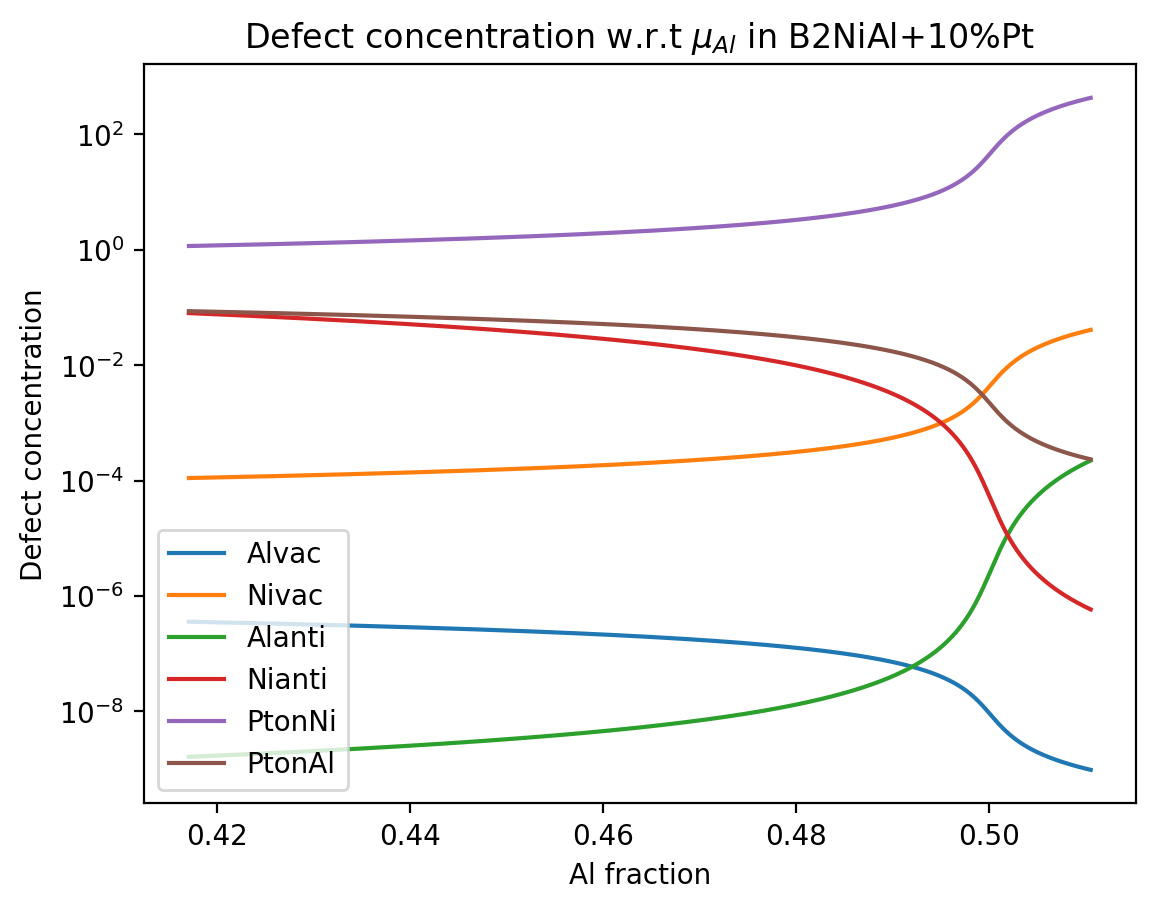

In [72]:
plt.plot(Conc_Al, get_concentration(EfPt_Alvac, T), label='Alvac')
plt.plot(Conc_Al, get_concentration(EfPt_Nivac, T), label='Nivac')
plt.plot(Conc_Al, get_concentration(EfPt_Alanti, T), label='Alanti')
plt.plot(Conc_Al, get_concentration(EfPt_Nianti, T), label='Nianti')
plt.plot(Conc_Al, get_concentration(EfPt_PtonNi, T), label='PtonNi')
plt.plot(Conc_Al, get_concentration(EfPt_PtonAl, T), label='PtonAl')
plt.xlabel("Al fraction")
plt.ylabel("Defect concentration")
plt.title("Defect concentration w.r.t $\mu_{Al}$ in B2NiAl+10%Pt")
plt.yscale('log')
plt.legend();

## Taking Energy of Pt on Ni sub-lattice = 0

$$E^f_{Pt_{Ni}} = <E^{box}_{Pt_{Ni}}> - [E^{box}_{B2NiAl10Pt}] + \mu_{Ni} - \mu_{Pt} = 0$$

$$\mu_{Pt} = <E^{box}_{Pt_{Ni}}> - [E^{box}_{B2NiAl10Pt}] + \mu_{Ni} $$

$$ E^f_{B2NiAl10Pt} = \mu_{Ni} + \mu_{Al} + \mu_{Pt} $$
$$ E^f_{B2NiAl10Pt} = 2\mu_{Ni} + \mu_{Al} + <E^{box}_{Pt_{Ni}}> - [E^{box}_{B2NiAl10Pt}] $$
$$ 2\mu_{Ni} + \mu_{Al} = E^f_{B2NiAl10Pt} - <E^{box}_{Pt_{Ni}}> + [E^{box}_{B2NiAl10Pt}] $$
$$E_{diff} = E^f_{B2NiAl10Pt} - <E^{box}_{Pt_{Ni}}> + [E^{box}_{B2NiAl10Pt}]$$
$$2\mu_{Ni} + \mu_{Al} = E_{diff}$$

In [73]:
E_diff = EfPtB2NiAl - EPt_PtonNi + total_E10PtB2NiAl

In [74]:
Mu_Al = np.linspace(EfPtB2NiAl, 0, 1000)
Mu_Ni = EfPtB2NiAl - Mu_Al

In [75]:
# New Mu_Pt

Mu_Pt = get_10Ptbox_energy(EPt_PtonNi, i = 'PtonNi') - get_10Ptbox_energy(total_E10PtB2NiAl, i = 'Bulk') + Mu_Ni

In [76]:
# Ni vacancy with respect to chemical potential

EfMuPt_Nivac = get_10Ptbox_energy(EPt_Ni_vac, i='Nivac') - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') + Mu_Ni

In [77]:
# Al vacancy with respect to chemical potential

EfMuPt_Alvac = get_10Ptbox_energy(EPt_Al_vac, i='Alvac') - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') + Mu_Al

In [78]:
# Pt vacancy with respect to chemical potential

EfMuPt_Ptvac = get_10Ptbox_energy(EPt_Pt_vac, i='Ptvac') - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') + Mu_Pt

In [79]:
# Ni antisite with respect to chemical potential

EfMuPt_Nianti = get_10Ptbox_energy(EPt_Ni_anti, i='Nianti') - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') - Mu_Ni + Mu_Al

In [80]:
# Al antisite with respect to chemical potential

EfMuPt_Alanti = get_10Ptbox_energy(EPt_Al_anti, i='Alanti') - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') + Mu_Ni - Mu_Al

In [81]:
# Pt on Al sub-lattice with respect to chemical potential

EfMuPt_PtonAl = get_10Ptbox_energy(EPt_PtonAl, i='PtonAl') - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') - Mu_Pt + Mu_Al

In [82]:
EfMuPt_PtonNi = np.zeros((1000))

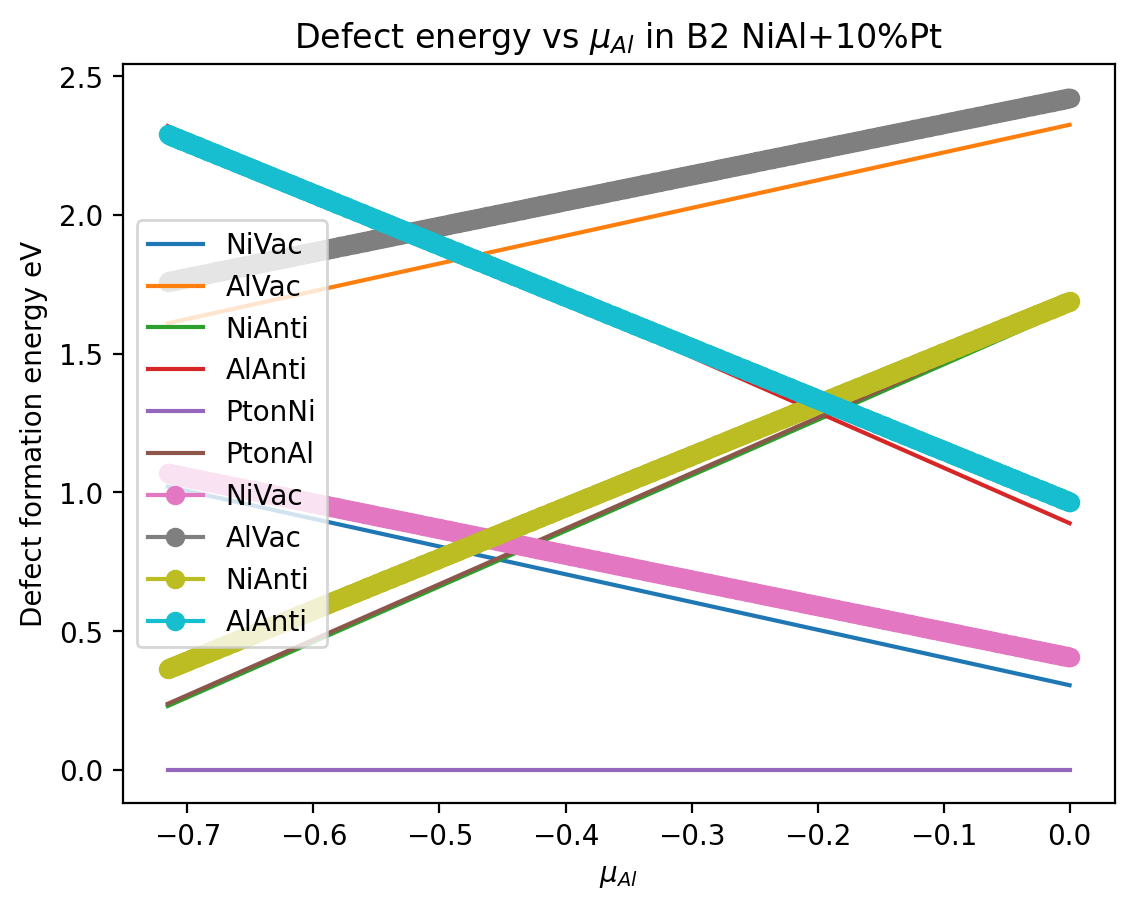

In [83]:
plt.plot(Mu_Al, EfMuPt_Nivac, label='NiVac')
plt.plot(Mu_Al, EfMuPt_Alvac, label='AlVac')
plt.plot(Mu_Al, EfMuPt_Nianti, label='NiAnti')
plt.plot(Mu_Al, EfMuPt_Alanti, label='AlAnti')
plt.plot(Mu_Al, EfMuPt_PtonNi, label='PtonNi')
plt.plot(Mu_Al, EfMuPt_PtonAl, label='PtonAl')
plt.plot(Mu_Al, Ef_Nivac, label='NiVac', marker='o')
plt.plot(Mu_Al, Ef_Alvac, label='AlVac', marker='o')
plt.plot(Mu_Al, Ef_Nianti, label='NiAnti', marker='o')
plt.plot(Mu_Al, Ef_Alanti, label='AlAnti', marker='o')
plt.xlabel('$\mu_{Al}$')
plt.ylabel('Defect formation energy eV')
plt.legend()
plt.title('Defect energy vs $\mu_{Al}$ in B2 NiAl+10%Pt');

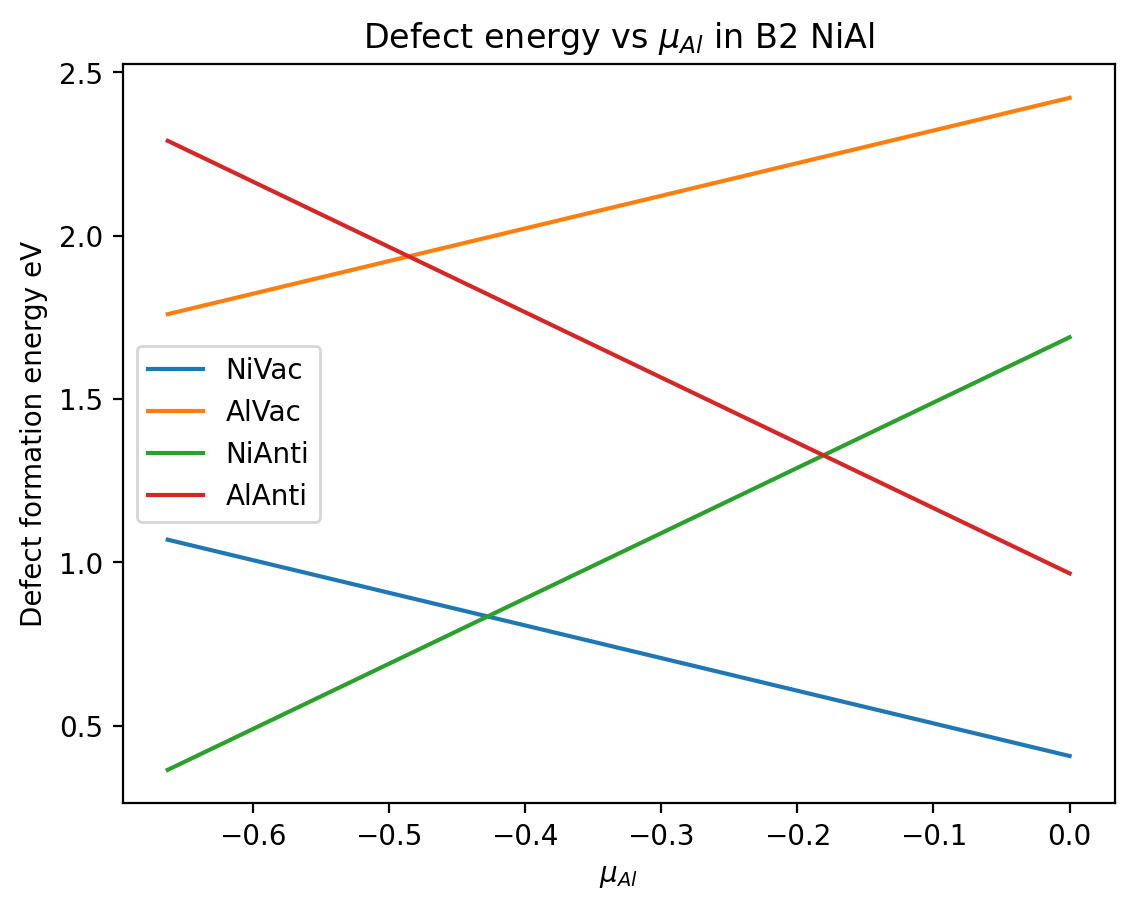

In [84]:
plt.plot(mu_Al, Ef_Nivac, label='NiVac')
plt.plot(mu_Al, Ef_Alvac, label='AlVac')
plt.plot(mu_Al, Ef_Nianti, label='NiAnti')
plt.plot(mu_Al, Ef_Alanti, label='AlAnti')
plt.xlabel('$\mu_{Al}$')
plt.ylabel('Defect formation energy eV')
plt.legend()
plt.title('Defect energy vs $\mu_{Al}$ in B2 NiAl');

In [85]:
ConcMu_Al = get_ternary_Al_concentration(get_concentration(EfMuPt_Alanti, T), get_concentration(EfMuPt_Nianti, T),
                                      0.1*get_concentration(EfMuPt_PtonNi, T), get_concentration(EfMuPt_Alvac, T),
                                      get_concentration(EfMuPt_Nivac, T), get_concentration(EfMuPt_Ptvac, T),
                                      get_concentration(EfMuPt_PtonAl, T))

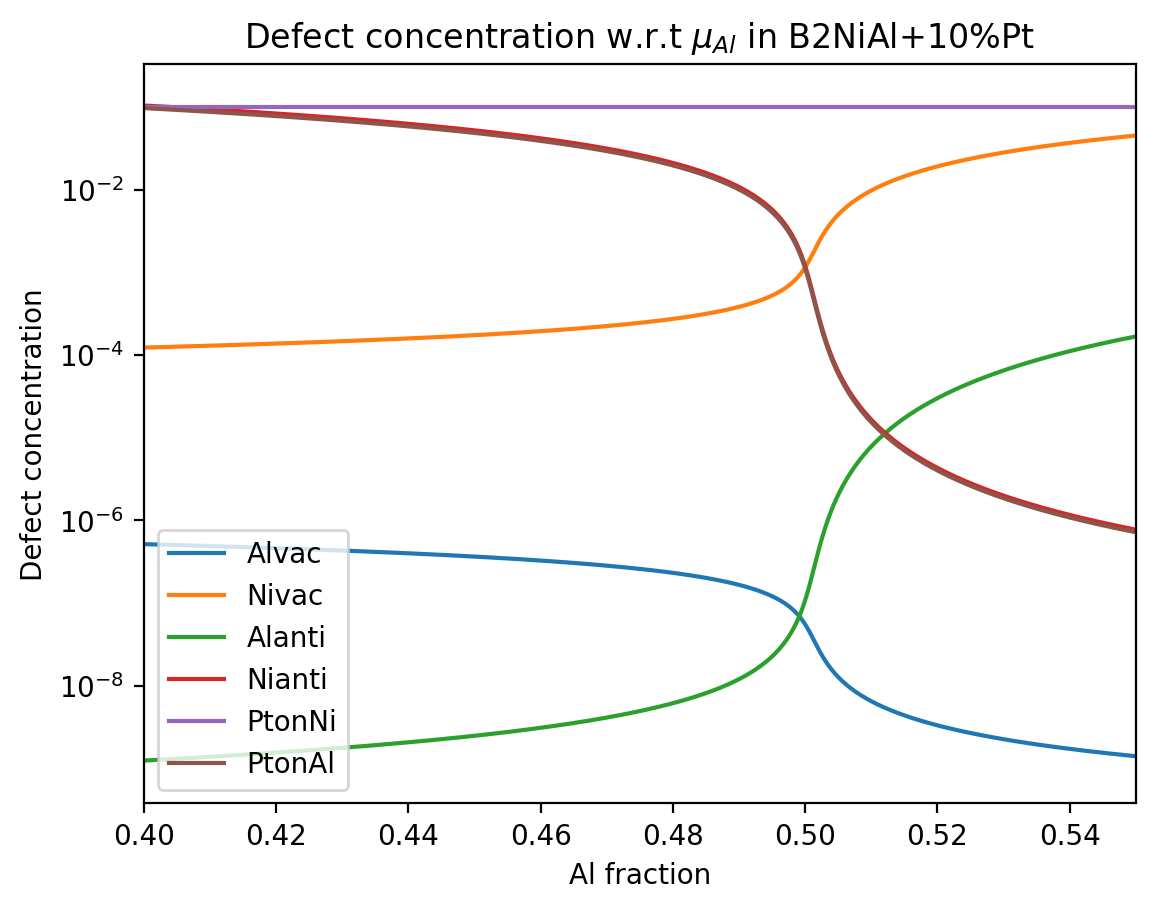

In [86]:
plt.plot(ConcMu_Al, get_concentration(EfMuPt_Alvac, T), label='Alvac')
plt.plot(ConcMu_Al, get_concentration(EfMuPt_Nivac, T), label='Nivac')
plt.plot(ConcMu_Al, get_concentration(EfMuPt_Alanti, T), label='Alanti')
plt.plot(ConcMu_Al, get_concentration(EfMuPt_Nianti, T), label='Nianti')
plt.plot(ConcMu_Al, 0.1*get_concentration(EfMuPt_PtonNi, T), label='PtonNi')
plt.plot(ConcMu_Al, get_concentration(EfMuPt_PtonAl, T), label='PtonAl')
plt.xlim(0.4,0.55)
plt.xlabel("Al fraction")
plt.ylabel("Defect concentration")
plt.title("Defect concentration w.r.t $\mu_{Al}$ in B2NiAl+10%Pt")
plt.yscale('log')
plt.legend();